In [1]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import matplotlib.pyplot as plt
import folium
import json

from datetime import datetime,timedelta
#from sklearn.metrics import mean_squared_error
#from scipy.stats import norm
#from scipy.optimize import curve_fit
#from scipy.optimize import fsolve

#%matplotlib inline+

# BR / Brasil - geojson/geojs-100-mun.json
# AL / Alagoas - geojson/geojs-27-mun.json
# BA / Bahia - geojson/geojs-29-mun.json
# CE / Ceará - geojson/geojs-23-mun.json
# MA / Maranhão - geojson/geojs-21-mun.json
# PB / Paraíba - geojson/geojs-25-mun.json
# PE / Pernambuco - geojson/geojs-26-mun.json
# PI / Piauí - geojson/geojs-22-mun.json
# RN / Rio Grande do Norte - geojson/geojs-24-mun.json
# SE / Sergipe - geojson/geojs-28-mun.json

In [2]:
url_B = "https://data.brasil.io/dataset/covid19/caso_full.csv.gz"
url_G = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-100-mun.json"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'}

filename = url_B.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url_B)
    r.encoding = "UTF-8"
    f.write(r.content)

#req = urllib.request.urlopen(url_G) 
#content = req.read().decode('ansi')

#geo = json.loads(content)

In [3]:
df = pd.read_csv(url_B.split("/")[-1], sep = ",")

In [4]:
df.sort_values('order_for_place', ascending = True).head(60)

city  city_ibge_code        date  \
0                        São Paulo       3550308.0  2020-02-25   
377450                  Planaltino       2924900.0  2020-07-17   
204286                    Glicério       3517109.0  2020-06-13   
23466                       Capela       2701704.0  2020-04-21   
23471                    Maribondo       2704807.0  2020-04-21   
23484                       Beruri       1300631.0  2020-04-21   
204195                  Cafelândia       3508801.0  2020-06-13   
23549                  Cravolândia       2909505.0  2020-04-21   
203688       Santa Maria do Herval       4316956.0  2020-06-13   
203648                      Pinhal       4314456.0  2020-06-13   
23594                 Paulo Afonso       2924009.0  2020-04-21   
23621                    Água Fria       2900405.0  2020-04-21   
23631                     Arneiroz       2301505.0  2020-04-21   
23633                     Barbalha       2301901.0  2020-04-21   
203094             Teixeira Soares       4127007.0  2020-06-13   
203080      São José das Palmeiras       4125456.0  2020-06-13   
204393                     Lourdes       3527256.0  2020-06-13   
23695                        Ocara       2309458.0  2020-04-21   
205105                  Belo Campo       2903508.0  2020-06-14   
23363                     Quintana       3542008.0  2020-04-20   
206601      São Domingos das Dores       3160959.0  2020-06-14   
23109                        Irani       4207809.0  2020-04-20   
206499        Piedade de Caratinga       3150158.0  2020-06-14   
206403                  Luminárias       3138708.0  2020-06-14   
206376                       Jaíba       3135050.0  2020-06-14   
23183               Porto da Folha       2805604.0  2020-04-20   
206299                 Frei Gaspar       3126802.0  2020-06-14   
375568               Morro Redondo       4312450.0  2020-07-16   
23249                 Elias Fausto       3514908.0  2020-04-20   
23265                   Guzolândia       3518909.0  2020-04-20   
375683            Silveira Martins       4320651.0  2020-07-16   
23318                 Miguelópolis       3529708.0  2020-04-20   
23320                 Mirandópolis       3530102.0  2020-04-20   
375981            Presidente Nereu       4214102.0  2020-07-16   
205312               Nova Redenção       2922854.0  2020-06-14   
205228                      Itambé       2915809.0  2020-06-14   
23720        São João do Jaguaribe       2312502.0  2020-04-21   
202894          Engenheiro Beltrão       4107504.0  2020-06-13   
202880           Corumbataí do Sul       4106555.0  2020-06-13   
24121                   Cajazeiras       2503704.0  2020-04-21   
24123                        Conde       2504603.0  2020-04-21   
24125       Cruz do Espírito Santo       2504900.0  2020-04-21   
201066                 Nova Aurora       5214804.0  2020-06-13   
24127                    Itabaiana       2506905.0  2020-04-21   
24179                        Inajá       2607000.0  2020-04-21   
24182                       Itambé       2607653.0  2020-04-21   
24186                      Jataúba       2608008.0  2020-04-21   
24224                       Tabira       2614600.0  2020-04-21   
24251                      Nazária       2206720.0  2020-04-21   
200389                  Catolândia       2907400.0  2020-06-13   
24316                   Mandaguari       4114203.0  2020-04-21   
200326           Antônio Gonçalves       2901809.0  2020-06-13   
200321                   Andorinha       2901353.0  2020-06-13   
380915        Dilermando de Aguiar       4306379.0  2020-07-17   
24112                   Tracuateua       1508035.0  2020-04-21   
24110                    Tailândia       1507953.0  2020-04-21   
24109   São Sebastião da Boa Vista       1507706.0  2020-04-21   
24104          Santa Maria do Pará       1506609.0  2020-04-21   
23733                       Alegre       3200201.0  2020-04-21   
23746             Domingos Martins       3201902.0  2020-04-21   

   

req = urllib.request.urlopen(url_G)
content = req.read().decode('ansi')

geo = json.loads(content)

In [5]:
Norte = ["AC", "AM", "AP", "PA", "RO", "RR", "TO"]
Nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
Sudeste = ['ES', 'MG', 'RJ', 'SP']
Sul = ['PR', 'RS', 'SC']
Centro_oeste = ['DF', 'GO', 'MT', 'MS']

Regiao = [Nordeste, Norte, Sudeste, Sul, Centro_oeste]
reg = ['Nordeste', 'Norte', 'Sudeste', 'Sul', 'Centro Oeste']

IFR_BR = [[['AL', 1.1], ['BA', 1.1], ['CE', 1.1], ['MA', 1], ['PB', 1.2], ['PE', 1.1], ['PI', 0], ['RN', 1.1], ['SE', 0]],
          [["AC", 0], ["AM", 0.8], ["AP", 0], ["PA", 0.9], ["RO", 0], ["RR", 0], ["TO", 0]],
          [['ES', 0.9], ['MG', 1], ['RJ', 0.8], ['SP', 0.7]],
          [['PR', 0], ['RS', 0.9], ['SC', 0.8]],
          [['DF', 0], ['GO', 0], ['MT', 0], ['MS', 0]]
         ]

In [6]:
df1 = df.drop(['epidemiological_week', 'is_repeated'], axis = 1).sort_values('date', ascending = True)
df1.rename(columns={'last_available_confirmed' : 'confirmed', 'last_available_confirmed_per_100k_inhabitants' : 'incidence',
                    'estimated_population_2019' : 'population','last_available_deaths' : 'deaths',
                    'last_available_death_rate' : 'death_rate', 'order_for_place' : 'day'}, inplace = True)

In [7]:
df_hoje = df1.loc[df['is_last'] == True, :]

label = ["Cidade", "Código IBGE", "Dia", "Último Dado", "Casos Confirmados", "Incidência de Casos", "Mortalidade", "Óbitos Confirmados", "Estado", "Novos Casos", "Novas Mortes"]

color = ['#e8615d', '#f49436', '#2d9de5', '#3bbdbd', '#634792']
color2 = ['#00876c', '#379469', '#58a066', '#78ab63', '#98b561', '#b8bf62', '#dac767',
          '#deb256', '#e09d4b', '#e18745', '#e06f45', '#dc574a', '#d43d51']
color3 = ['#00876c', '#4ea06d', '#84b76e', '#bbcd73', '#f4e07f', '#f4ba61', '#ef9250', 
          '#e5694c', '#d43d51']

In [8]:
for r in range(len(Regiao)) :
    for a in range(len(Regiao[r])) :
        df1.loc[df1['state'].eq(Regiao[r][a]), 'region'] = reg[r]
        df1.loc[df1['state'].eq(IFR_BR[r][a][0]), 'IFR'] = IFR_BR[r][a][1]

In [9]:
FMT = '%Y-%m-%d'

#date = df['date']
#df1['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-02-25", FMT)).days)

In [10]:
df_estados = df1.loc[df['city'].isnull(), :].drop(['place_type'], axis = 1)
df_estados.reset_index(drop = True, inplace = True)

df_estados = df_estados[['state', 'region', 'population', 'is_last', 'date', 'day',
                         'confirmed', 'deaths', 'new_confirmed', 'new_deaths', 'incidence', 'death_rate', 'IFR']]         
 
df_Brasil = df_estados.drop(['is_last', 'population', 'day'], axis = 1)
df_Brasil = df_Brasil.groupby('date').sum()

In [11]:
df_estados[df_estados['is_last']].drop(['is_last', 'day', 'population'], axis = 1).reset_index(drop = True )

state        region        date  confirmed  deaths  new_confirmed  \
0     TO         Norte  2020-07-29      24278     368            761   
1     RR         Norte  2020-07-29      31455     501            459   
2     RN      Nordeste  2020-07-29      49812    1757            618   
3     MS  Centro Oeste  2020-07-29      24287     357            876   
4     SP       Sudeste  2020-07-30     529006   22710          14809   
5     AP         Norte  2020-07-30      36272     561            299   
6     AM         Norte  2020-07-30     100140    3252           1047   
7     AL      Nordeste  2020-07-30      58979    1554            855   
8     AC         Norte  2020-07-30      19573     521            207   
9     CE      Nordeste  2020-07-30     171565    7664           2427   
10    DF  Centro Oeste  2020-07-30     104446    1444           2104   
11    ES       Sudeste  2020-07-30      81886    2514           1239   
12    GO  Centro Oeste  2020-07-30      66899    1606           2649   
13    SE      Nordeste  2020-07-30      57684    1408           1470   
14    SC           Sul  2020-07-30      80904    1043           3903   
15    RO         Norte  2020-07-30      38407     864            773   
16    RJ       Sudeste  2020-07-30     163642   13348           1995   
17    PI      Nordeste  2020-07-30      51477    1329           1279   
18    PE      Nordeste  2020-07-30      93373    6526           1837   
19    PB      Nordeste  2020-07-30      81108    1785           1210   
20    PA         Norte  2020-07-30     154685    5728           1335   
21    MT  Centro Oeste  2020-07-30      50538    1794           1684   
22    MA      Nordeste  2020-07-30     119262    2996           1568   
23    PR           Sul  2020-07-30      73488    1861           2568   
24    BA      Nordeste  2020-07-31     166154    3463           4524   
25    RS           Sul  2020-07-31      66692    1876            219   
26    MG       Sudeste  2020-07-31     127106    2769           3691   

    new_deaths   incidence  death_rate  IFR  
0            4  1543.55171      0.0152  0.0  
1            8  5192.64198      0.0159  0.0  
2           16  1420.41882      0.0353  1.1  
3           15   873.95187      0.0147  0.0  
4          321  1152.04041      0.0429  0.7  
5            2  4288.83416      0.0155  0.0  
6            6  2416.15771      0.0325  0.8  
7           14  1767.23677      0.0263  1.1  
8           11  2219.32455      0.0266  0.0  
9           16  1878.70712      0.0447  1.1  
10          25  3463.90437      0.0138  0.0  
11          24  2037.64946      0.0307  0.9  
12          52   953.20071      0.0240  0.0  
13          18  2509.42273      0.0244  0.0  
14          41  1129.18903      0.0129  0.8  
15           9  2161.06571      0.0225  0.0  
16         150   947.82821      0.0816  0.8  
17          25  1572.66820      0.0258  0.0  
18          42   977.00436      0.0699  1.1  
19          19  2018.55243      0.0220  1.2  
20          29  1798.06378      0.0370  0.9  
21          42  1450.38006      0.0355  0.0  
22          18  1685.63886      0.0251  1.0  
23          47   642.71713      0.0253  0.0  
24          72  1117.14708      0.0208  1.1  
25          51   586.18791      0.0281  0.9  
26          77   600.44053      0.0218  1.0

In [12]:
df_cidades = df1.loc[df['place_type'].eq('city'), :].drop(['place_type'], axis = 1)
df_cidades = df_cidades.loc[(df_cidades["city"] != 'Importados/Indefinidos'), :]

df_cidades = df_cidades[['city', 'state', 'region', 'population', 'is_last', 'date', 'day',
                         'confirmed', 'deaths', 'new_confirmed', 'new_deaths']]

In [13]:
df_cidades[df_cidades['is_last']].drop(['is_last', 'day'], axis = 1).reset_index(drop = True )

city state        region  population        date  confirmed  \
0          Nortelândia    MT  Centro Oeste      5989.0  2020-07-23         42   
1               Nobres    MT  Centro Oeste     15336.0  2020-07-23        123   
2     Mirassol d'Oeste    MT  Centro Oeste     27739.0  2020-07-23        269   
3               Matupá    MT  Centro Oeste     16566.0  2020-07-23        325   
4          Marcelândia    MT  Centro Oeste     10499.0  2020-07-23        204   
...                ...   ...           ...         ...         ...        ...   
5459      Nova Serrana    MG       Sudeste    102693.0  2020-07-31        230   
5460      Nova Resende    MG       Sudeste     16723.0  2020-07-31         47   
5461  Nova Porteirinha    MG       Sudeste      7500.0  2020-07-31         42   
5462        Nova Ponte    MG       Sudeste     15545.0  2020-07-31        146   
5463            Olaria    MG       Sudeste      1747.0  2020-07-31          4   

      deaths  new_confirmed  new_deaths  
0          0              0           0  
1          6              3           0  
2          3             37           0  
3          2              4           0  
4          2              0           0  
...      ...            ...         ...  
5459       8              3           0  
5460       0              4           0  
5461       2              0           0  
5462       4              3           0  
5463       0              0           0  

[5464 rows x 9 columns]

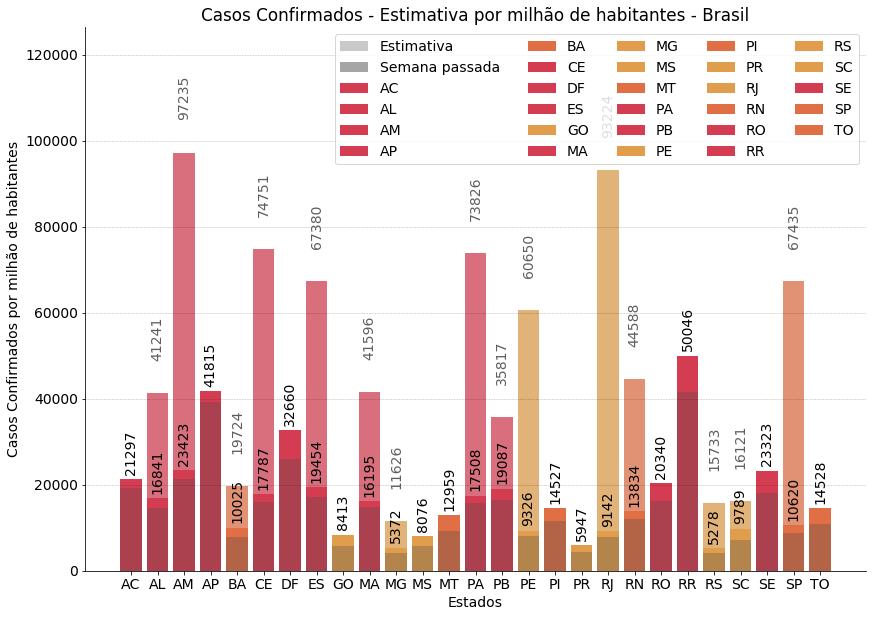

In [14]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]
  
plt.rc('font', size=14)
plt.rcParams['figure.figsize'] = [14, 10]

plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)
plt.gca().get_xaxis().tick_bottom()    
plt.gca().get_yaxis().tick_left()
plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)

estados = list(df_estados.loc[df_estados['is_last'],
                              ['state']
                             ].sort_values('state', ascending = True)['state'].unique())

y_max = 20000
yp_max = 75000

plt.bar(estados[0], 1, label = 'Estimativa', color = (.3, .3, .3, .3))
plt.bar(estados[0], 1, label = 'Semana passada', color = (.3, .3, .3, .5))

for e in range(27) :      
    pop = max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']), 
                             ['population']].loc[:, 'population'])

    IFR = max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']),
                             ['IFR']].loc[:, 'IFR'])        
#         if IFR == 0 :
#             IFR = np.median(df_estados.loc[df_estados['is_last'], ['IFR']].loc[:, 'IFR'])

    y = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-1, 6].tail(7))

    y_pop = (10 ** 6) * y / pop       

    y_last = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-8, 6].tail(14))

    y_pop_last = (10 ** 6) * y_last / pop

    ratio = y_pop / y_max

    if ratio < .0625 :
        plt.bar(estados[e], y_pop, label = estados[e], color = color2[-11])
    elif (ratio >= .0625) & (ratio <= .125) :   
        plt.bar(estados[e], y_pop, label = estados[e], color = color2[-9])
    elif (ratio >= .125) & (ratio <= .25) :
        plt.bar(estados[e], y_pop, label = estados[e], color = color2[-7])
    elif (ratio >= .25) & (ratio <= .5) :
        plt.bar(estados[e], y_pop, label = estados[e], color = color2[-5])
    elif (ratio >= .5) & (ratio <= .75) :
         plt.bar(estados[e], y_pop, label = estados[e], color = color2[-3])
    else  :
        plt.bar(estados[e], y_pop, label = estados[e], color = color2[-1])
    
    plt.bar(estados[e], y_pop_last, color = (.3, .3, .3, .3))

    if (IFR != 0) :

        y_mortes = (10 ** 6) * np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                         :].sort_values('day', ascending = True).iloc[:-1, 7].tail(7)) / pop
        y_est = (100 * y_mortes / IFR) - y_pop
        

        if ratio < .0625 :
            plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-11])
        elif (ratio >= .0625) & (ratio <= .125) :   
            plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-9])
        elif (ratio >= .125) & (ratio <= .25) :
            plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-7])
        elif (ratio >= .25) & (ratio <= .5) :
            plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-5])
        elif (ratio >= .5) & (ratio <= .75) :
             plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-3])
        else  :
            plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-1])           

        plt.bar(estados[e], y_est, bottom = y_pop, color = (.9, .9, .9, .3))

        if y_est + y_pop > yp_max : 
            yp_max = y_est + y_pop

    if (y_pop != 0) :
        plt.text(estados[e], y_pop + 1000, str(int(round(y_pop))), color = 'black', rotation = 'vertical',
                     fontsize = 14, horizontalalignment = 'center', verticalalignment = 'bottom')
        if IFR != 0 :
            plt.text(estados[e], 7500 + y_est + y_pop, str(int(round(y_pop + y_est))), color = (0.1, 0.1, 0.1, 0.7), rotation = 'vertical',
                     fontsize = 14, horizontalalignment = 'center', verticalalignment = 'bottom')

plt.xlabel('Estados')       
plt.ylim(0, yp_max * 1.3)         
plt.title(label[6] + " - Estimativa por milhão de habitantes - Brasil")
plt.legend(ncol = 5)
plt.ylabel(label[6] + " por milhão de habitantes")
plt.savefig('Graphics/' + label[6] + " 1M.png")
plt.show()

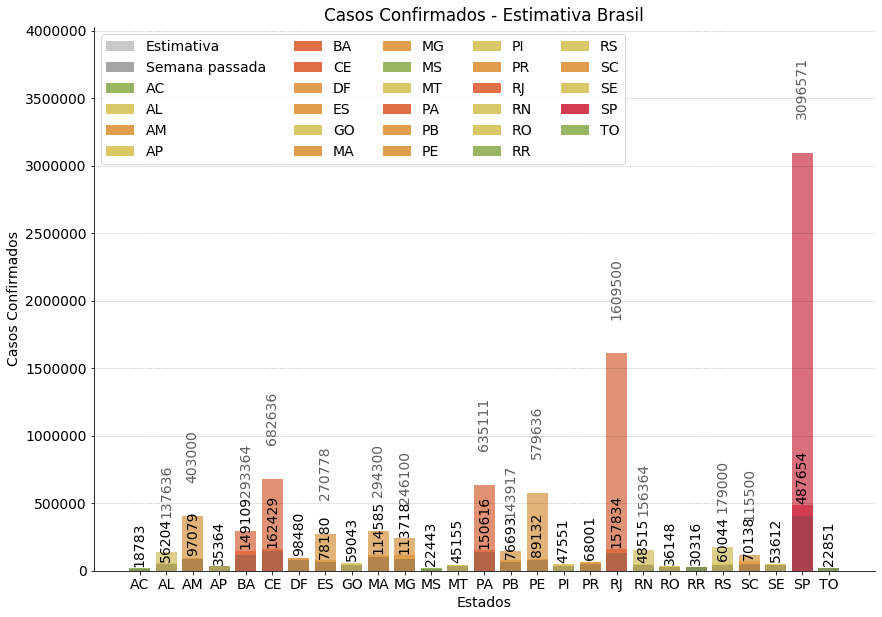

In [15]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]
  
plt.rc('font', size=14)
plt.rcParams['figure.figsize'] = [14, 10]

plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)
plt.gca().get_xaxis().tick_bottom()    
plt.gca().get_yaxis().tick_left()
plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)

estados = list(df_estados.loc[df_estados['is_last'],
                              ['state']
                             ].sort_values('state', ascending = True)['state'].unique())

y_max = 250000
yp_max = 1000000

plt.bar(estados[0], 1, label = 'Estimativa', color = (.3, .3, .3, .3))
plt.bar(estados[0], 1, label = 'Semana passada', color = (.3, .3, .3, .5))

for e in range(27) :      
    pop = 1 # max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']), 
            #                 ['population']].loc[:, 'population'])

    IFR = max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']),
                             ['IFR']].loc[:, 'IFR'])        
#         if IFR == 0 :
#             IFR = np.median(df_estados.loc[df_estados['is_last'], ['IFR']].loc[:, 'IFR'])

    y = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-1, 6].tail(7))

    y_pop =  y / pop       

    y_last = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-8, 6].tail(14))

    y_pop_last =  y_last / pop

    ratio = y_pop / y_max

    if ratio < .0625 :
        plt.bar(estados[e], y_pop, label = estados[e], color = color2[-11])
    elif (ratio >= .0625) & (ratio <= .125) :   
        plt.bar(estados[e], y_pop, label = estados[e], color = color2[-9])
    elif (ratio >= .125) & (ratio <= .25) :
        plt.bar(estados[e], y_pop, label = estados[e], color = color2[-7])
    elif (ratio >= .25) & (ratio <= .5) :
        plt.bar(estados[e], y_pop, label = estados[e], color = color2[-5])
    elif (ratio >= .5) & (ratio <= .75) :
         plt.bar(estados[e], y_pop, label = estados[e], color = color2[-3])
    else  :
        plt.bar(estados[e], y_pop, label = estados[e], color = color2[-1])
    
    plt.bar(estados[e], y_pop_last, color = (.3, .3, .3, .3))

    if (IFR != 0) :

        y_mortes = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                         :].sort_values('day', ascending = True).iloc[:-1, 7].tail(7)) / pop
        y_est = (100 * y_mortes / IFR) - y_pop
        

        if ratio < .0625 :
            plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-11])
        elif (ratio >= .0625) & (ratio <= .125) :   
            plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-9])
        elif (ratio >= .125) & (ratio <= .25) :
            plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-7])
        elif (ratio >= .25) & (ratio <= .5) :
            plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-5])
        elif (ratio >= .5) & (ratio <= .75) :
             plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-3])
        else  :
            plt.bar(estados[e], y_est, bottom = y_pop, color = color2[-1])           

        plt.bar(estados[e], y_est, bottom = y_pop, color = (.9, .9, .9, .3))

        if y_est + y_pop > yp_max : 
            yp_max = y_est + y_pop

    if (y_pop != 0) :
        plt.text(estados[e], y_pop + 10000, str(int(round(y_pop))), color = 'black', rotation = 'vertical',
                     fontsize = 14, horizontalalignment = 'center', verticalalignment = 'bottom')
        if IFR != 0 :
            plt.text(estados[e], 250000 + y_est + y_pop, str(int(round(y_pop + y_est))), color = (0.1, 0.1, 0.1, 0.7), rotation = 'vertical',
                     fontsize = 14, horizontalalignment = 'center', verticalalignment = 'bottom')

plt.xlabel('Estados')       
plt.ylim(0, yp_max * 1.3)         
plt.title(label[6] + " - Estimativa Brasil")
plt.legend(ncol = 5)
plt.ylabel(label[6])
plt.savefig('Graphics/' + label[6] + " Estimativa.png")
plt.show()

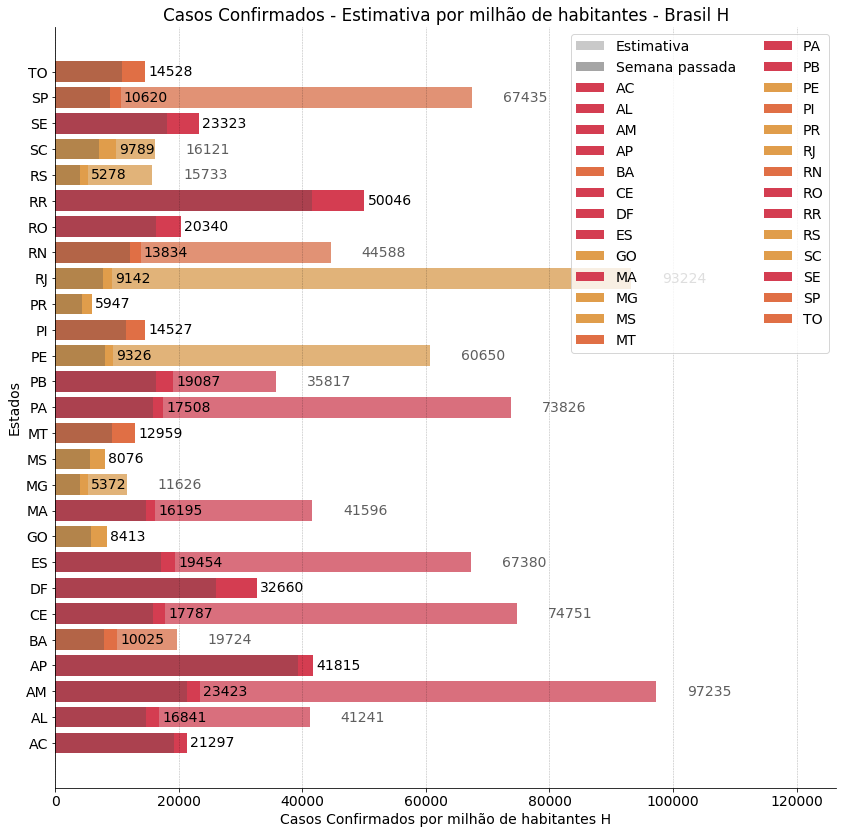

In [16]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]
  
plt.rc('font', size = 14)
plt.rcParams['figure.figsize'] = [14, 14]

plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)
plt.gca().get_xaxis().tick_bottom()    
plt.gca().get_yaxis().tick_left()
plt.grid(True, axis = 'x', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)

estados = list(df_estados.loc[df_estados['is_last'], ['state']
                             ].sort_values('state', ascending = True)['state'].unique())

y_max = 20000
yp_max = 75000

plt.barh(0, 1, label = 'Estimativa', color = (.3, .3, .3, .3))
plt.barh(0, 1, label = 'Semana passada', color = (.3, .3, .3, .5))

for e in range(27) :      
    pop = max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']), 
                             ['population']].loc[:, 'population'])

    IFR = max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']),
                             ['IFR']].loc[:, 'IFR'])        
#         if IFR == 0 :
#             IFR = np.median(df_estados.loc[df_estados['is_last'], ['IFR']].loc[:, 'IFR'])

    y = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-1, 6].tail(7))

    y_pop = (10 ** 6) * y / pop       

    y_last = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-8, 6].tail(14))

    y_pop_last = (10 ** 6) * y_last / pop

    ratio = y_pop / y_max

    if ratio < .0625 :
        plt.barh(e, y_pop, label = estados[e], color = color2[-11])
    elif (ratio >= .0625) & (ratio < .125) :   
        plt.barh(e, y_pop, label = estados[e], color = color2[-9])
    elif (ratio >= .125) & (ratio < .25) :
        plt.barh(e, y_pop, label = estados[e], color = color2[-7])
    elif (ratio >= .25) & (ratio < .5) :
        plt.barh(e, y_pop, label = estados[e], color = color2[-5])
    elif (ratio >= .5) & (ratio < .75) :
         plt.barh(e, y_pop, label = estados[e], color = color2[-3])
    else  :
        plt.barh(e, y_pop, label = estados[e], color = color2[-1])
    
    plt.barh(e, y_pop_last, color = (.3, .3, .3, .3))

    if (IFR != 0) :

        y_mortes = (10 ** 6) * np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                         :].sort_values('day', ascending = True).iloc[:-1, 7].tail(7)) / pop
        y_est = (100 * y_mortes / IFR) - y_pop
        

        if ratio < .0625 :
            plt.barh(e, y_est, left = y_pop, color = color2[-11])
        elif (ratio >= .0625) & (ratio <= .125) :   
            plt.barh(e, y_est, left = y_pop, color = color2[-9])
        elif (ratio >= .125) & (ratio <= .25) :
            plt.barh(e, y_est, left = y_pop, color = color2[-7])
        elif (ratio >= .25) & (ratio <= .5) :
            plt.barh(e, y_est, left = y_pop, color = color2[-5])
        elif (ratio >= .5) & (ratio <= .75) :
             plt.barh(e, y_est, left = y_pop, color = color2[-3])
        else  :
            plt.barh(e, y_est, left = y_pop, color = color2[-1])           

        plt.barh(e, y_est, left = y_pop, color = (.9, .9, .9, .3))

        if y_est + y_pop > yp_max : 
            yp_max = y_est + y_pop

    if (y_pop != 0) :
        plt.text(y_pop + 500, e, str(int(round(y_pop))), color = 'black',  
                     fontsize = 14, horizontalalignment = 'left', verticalalignment = 'center')
        if IFR != 0 :
            plt.text(5000 + y_est + y_pop, e, str(int(round(y_pop + y_est))), color = (0.1, 0.1, 0.1, 0.7),  
                     fontsize = 14, horizontalalignment = 'left', verticalalignment = 'center')

plt.yticks(range(len(estados)), estados)

plt.ylabel('Estados')       
plt.xlim(0, yp_max * 1.3)         
plt.title(label[6] + " - Estimativa por milhão de habitantes - Brasil H")
plt.legend(ncol = 2)
plt.xlabel(label[6] + " por milhão de habitantes H")
plt.savefig('Graphics/' + label[6] + " 1MH.png")
plt.show()

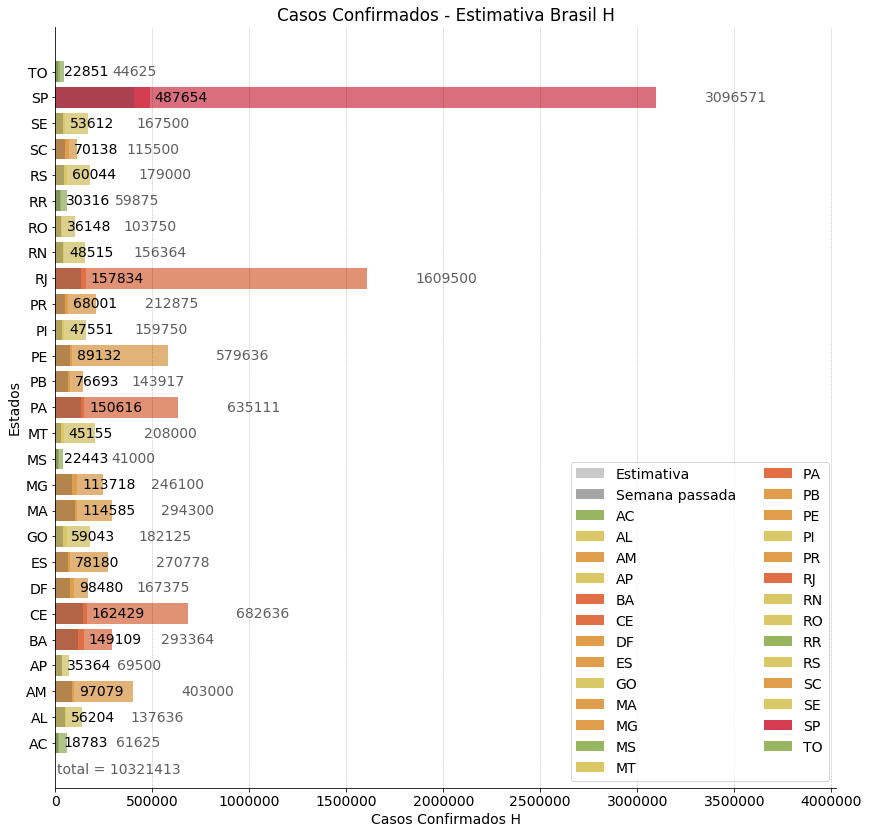

In [17]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]
  
plt.rc('font', size = 14)
plt.rcParams['figure.figsize'] = [14, 14]

plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)
plt.gca().get_xaxis().tick_bottom()    
plt.gca().get_yaxis().tick_left()
plt.grid(True, axis = 'x', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)

estados = list(df_estados.loc[df_estados['is_last'], ['state']
                             ].sort_values('state', ascending = True)['state'].unique())

y_max = 250000
yp_max = 0
summ = 0

plt.barh(0, 1, label = 'Estimativa', color = (.3, .3, .3, .3))
plt.barh(0, 1, label = 'Semana passada', color = (.3, .3, .3, .5))

for e in range(27) :      
    pop = 1 #max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']), 
            #                 ['population']].loc[:, 'population'])

    IFR = max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']),
                             ['IFR']].loc[:, 'IFR'])        
    if IFR == 0 :
        IFR = np.median(df_estados.loc[df_estados['is_last'], ['IFR']].loc[:, 'IFR'])

    y = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-1, 6].tail(7))

    y_pop = y / pop       

    y_last = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-8, 6].tail(14))

    y_pop_last = y_last / pop

    ratio = y_pop / y_max

    if ratio < .0625 :
        plt.barh(e, y_pop, label = estados[e], color = color2[-11])
    elif (ratio >= .0625) & (ratio < .125) :   
        plt.barh(e, y_pop, label = estados[e], color = color2[-9])
    elif (ratio >= .125) & (ratio < .25) :
        plt.barh(e, y_pop, label = estados[e], color = color2[-7])
    elif (ratio >= .25) & (ratio < .5) :
        plt.barh(e, y_pop, label = estados[e], color = color2[-5])
    elif (ratio >= .5) & (ratio < .75) :
         plt.barh(e, y_pop, label = estados[e], color = color2[-3])
    else  :
        plt.barh(e, y_pop, label = estados[e], color = color2[-1])
    
    plt.barh(e, y_pop_last, color = (.3, .3, .3, .3))

    if (IFR != 0) :

        y_mortes = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                         :].sort_values('day', ascending = True).iloc[:-1, 7].tail(7)) / pop
        y_est = (100 * y_mortes / IFR) - y_pop
        

        if ratio < .0625 :
            plt.barh(e, y_est, left = y_pop, color = color2[-11])
        elif (ratio >= .0625) & (ratio <= .125) :   
            plt.barh(e, y_est, left = y_pop, color = color2[-9])
        elif (ratio >= .125) & (ratio <= .25) :
            plt.barh(e, y_est, left = y_pop, color = color2[-7])
        elif (ratio >= .25) & (ratio <= .5) :
            plt.barh(e, y_est, left = y_pop, color = color2[-5])
        elif (ratio >= .5) & (ratio <= .75) :
             plt.barh(e, y_est, left = y_pop, color = color2[-3])
        else  :
            plt.barh(e, y_est, left = y_pop, color = color2[-1])           

        plt.barh(e, y_est, left = y_pop, color = (.9, .9, .9, .3))
        
        if y_est + y_pop > yp_max : 
            yp_max = y_est + y_pop
    else : 
        y_est = 0
    
    if (y_pop != 0) :
        plt.text(y_pop + 25000, e, str(int(round(y_pop))), color = 'black',  
                     fontsize = 14, horizontalalignment = 'left', verticalalignment = 'center')
        if IFR != 0 :
            plt.text(250000 + y_est + y_pop, e, str(int(round(y_pop + y_est))), color = (0.1, 0.1, 0.1, 0.7),  
                     fontsize = 14, horizontalalignment = 'left', verticalalignment = 'center')
    summ += y_est + y_pop

plt.yticks(range(len(estados)), estados)
plt.text(10000, -1.05, "total = " + str(int(round(summ))), color = (0.1, 0.1, 0.1, 0.7),
         fontsize = 14, horizontalalignment = 'left', verticalalignment = 'center')
plt.ylabel('Estados')       
plt.xlim(0, yp_max * 1.3)         
plt.title(label[6] + " - Estimativa Brasil H")
plt.legend(ncol = 2)
plt.xlabel(label[6] + " H")
plt.savefig('Graphics/' + label[6] + " Estimativa H.png")
plt.show()

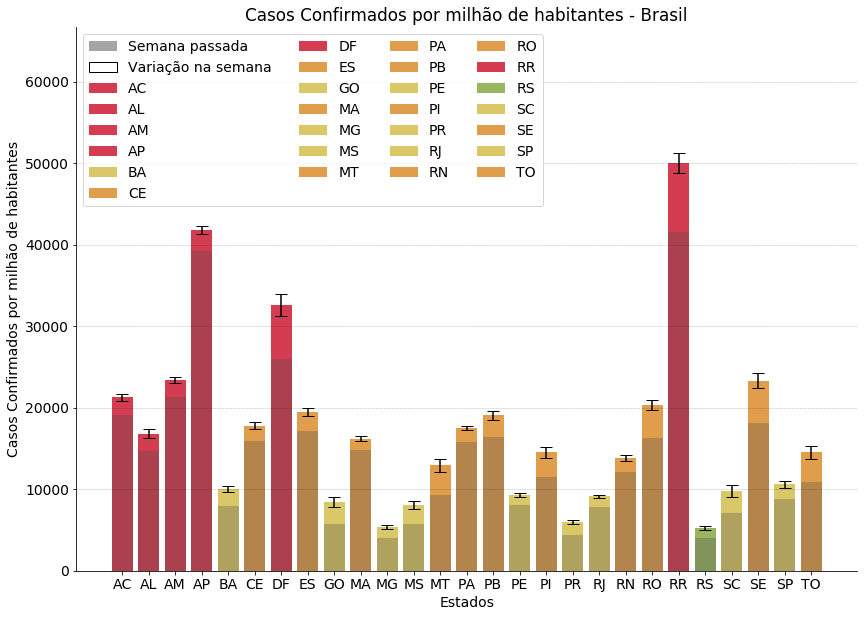

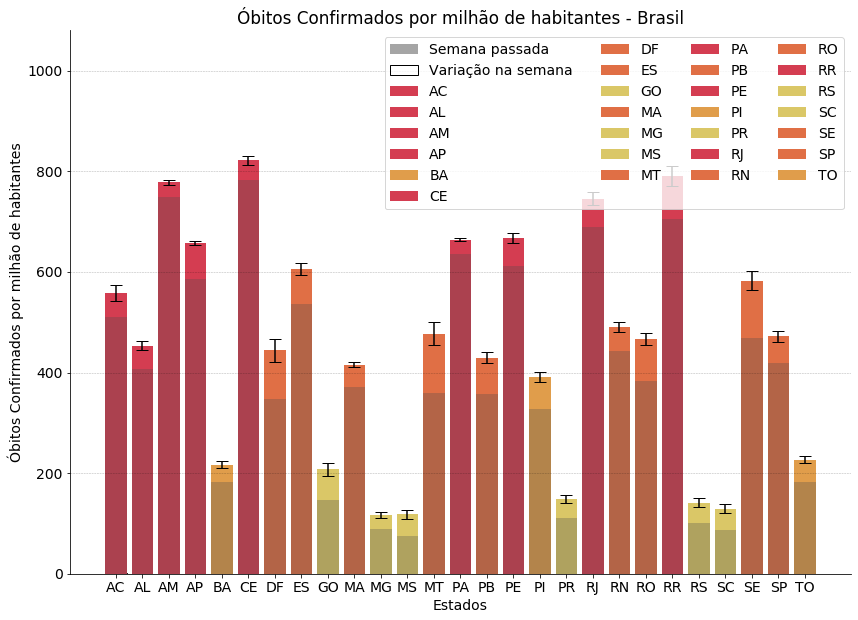

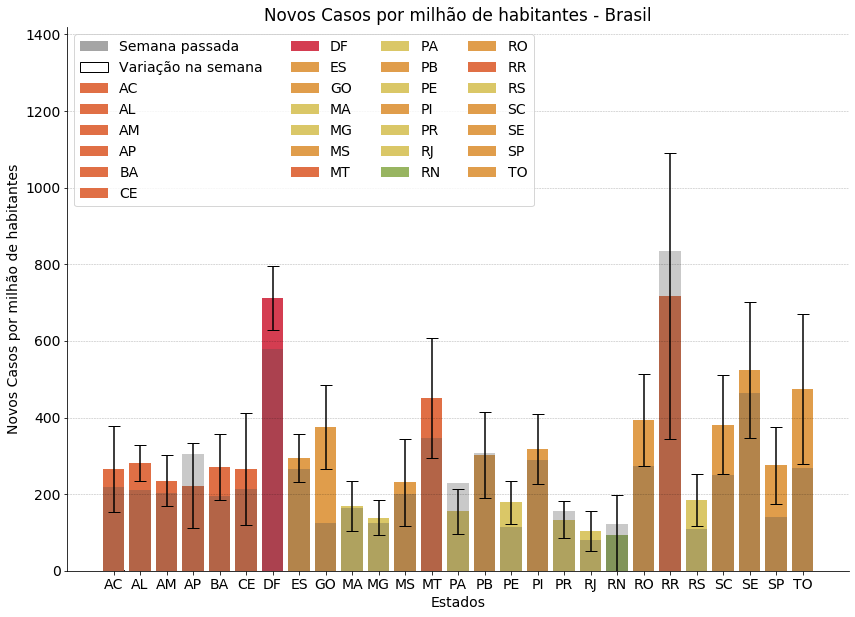

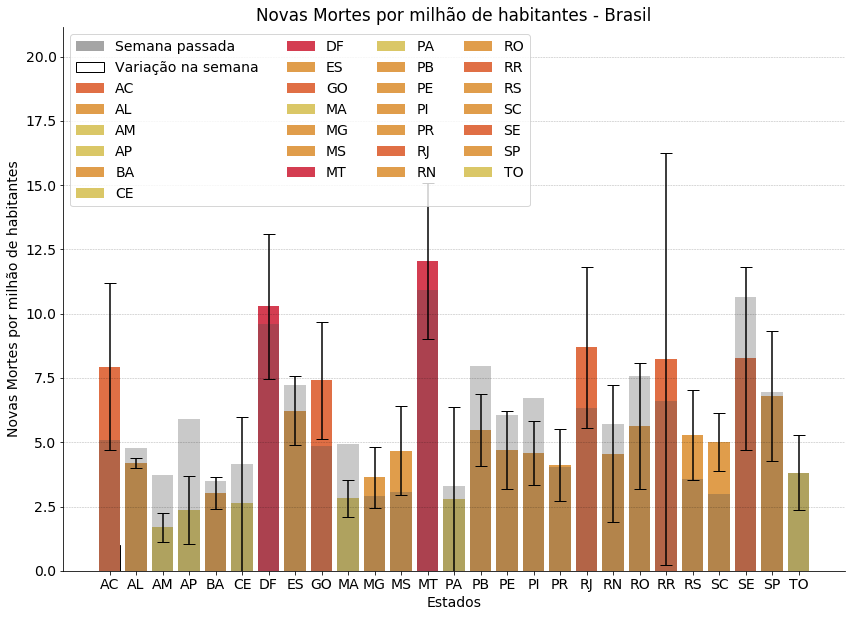

In [18]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

for f in range(6, 10) :  
    plt.rc('font', size=14)
    plt.rcParams['figure.figsize'] = [14, 10]

    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()    
    plt.gca().get_yaxis().tick_left()
    plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)

    estados = list(df_estados.loc[df_estados['is_last'],
                                  ['state']
                                 ].sort_values('state', ascending = True)['state'].unique())

    y_max = 0
    y_pmax = [5000, 1000, 1000, 200]
        
    plt.bar(estados[0], 1, label = 'Semana passada', color = (.3, .3, .3, .5))
    plt.bar(estados[0], 1, label = 'Variação na semana', color = (1, 1, 1, 0.1), edgecolor = 'black')
    
    for e in range(27) :      
        pop = max(df_estados.loc[(df_estados['state'] == estados[e]) & (df_estados['is_last']), 
                                 ['population']].loc[:, 'population'])
        
        y = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                   :].sort_values('day', ascending = True).iloc[:-1, f].tail(7))
        
        y_pop = (10 ** 6) * y / pop
        y_pop_std = (10 ** 6) * np.std(df_estados.loc[(df_estados['state'] == estados[e]),
                                                   :].sort_values('day', ascending = True).iloc[:-1, f].tail(7)) / pop        
        
        y_last = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                   :].sort_values('day', ascending = True).iloc[:-8, f].tail(14))
        
        y_pop_last = (10 ** 6) * y_last / pop
        y_pop_last_std = (10 ** 6) * np.std(df_estados.loc[(df_estados['state'] == estados[e]), 
                                                    :].sort_values('day', ascending = True).iloc[:-8, f].tail(14)) / pop
        
        if (y_pop + y_pop_std) > y_max : y_max = (y_pop + y_pop_std)
        #print(y_pop_std)
        
        ratio = y_pop / y_max
        
        if ratio < .0625 :
            plt.bar(estados[e], y_pop, yerr = y_pop_std, label = estados[e], color = color2[-11], align='center', capsize = 6)
        elif (ratio >= .0625) & (ratio <= .125) :   
            plt.bar(estados[e], y_pop, yerr = y_pop_std, label = estados[e], color = color2[-9], align='center', capsize = 6)
        elif (ratio >= .125) & (ratio <= .25) :
            plt.bar(estados[e], y_pop, yerr = y_pop_std, label = estados[e], color = color2[-7], align='center', capsize = 6)
        elif (ratio >= .25) & (ratio <= .5) :
            plt.bar(estados[e], y_pop, yerr = y_pop_std, label = estados[e], color = color2[-5], align='center', capsize = 6)
        elif (ratio >= .5) & (ratio <= .75) :
             plt.bar(estados[e], y_pop, yerr = y_pop_std, label = estados[e], color = color2[-3], align='center', capsize = 6)
        else  :
            plt.bar(estados[e], y_pop, yerr = y_pop_std, label = estados[e], color = color2[-1], align='center', capsize = 6)
        
        plt.bar(estados[e], y_pop_last, color = (.3, .3, .3, .3))
        
    plt.xlabel('Estados')       
    plt.ylim(0, y_max * 1.3)         
    plt.title(label[f] + " por milhão de habitantes - Brasil")
    plt.legend(ncol = 4)
    plt.ylabel(label[f] + " por milhão de habitantes")
    plt.savefig('Graphics/' + label[f] + " 1M.png")
    plt.show()

In [19]:
print(y_max, y_pop, y_pop_std)

16.265390735885717 3.8146924149927584 1.4588817396495144


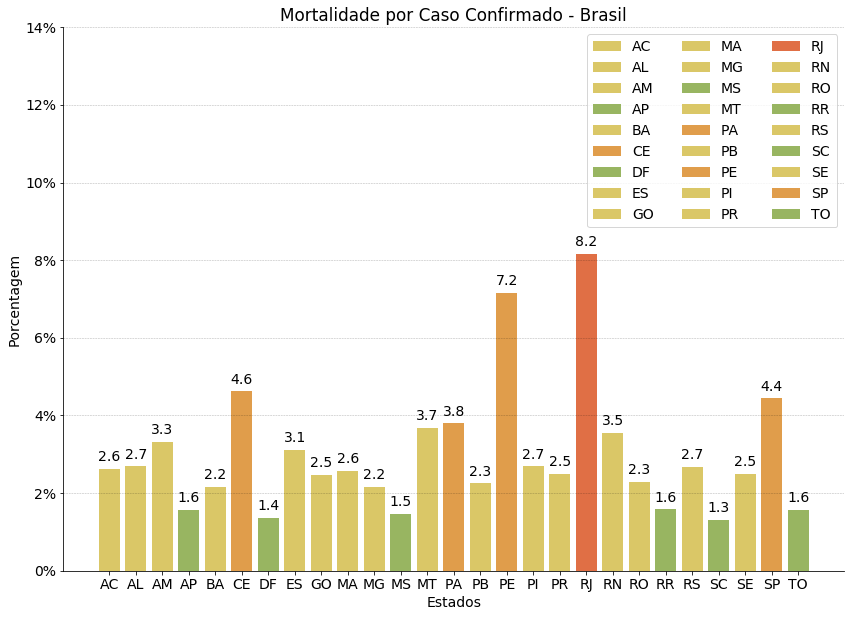

In [20]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]
   
plt.rc('font', size = 14)
plt.rcParams['figure.figsize'] = [14, 10]

plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)
plt.gca().get_xaxis().tick_bottom()    
plt.gca().get_yaxis().tick_left()
plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)


estados = list(df_estados.loc[df_estados['is_last'],
                              ['state']
                             ].sort_values('state', ascending = True)['state'].unique())

y_max = 1

for e in range(27) :      
    y = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-1, 7].tail(7))
    
    yc = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-1, 6].tail(7))

    ymor = y / yc

    ratio = ymor / 0.15

    if ratio < .0625 :
        plt.bar(estados[e], ymor, label = estados[e], color = color2[-11])
    elif (ratio >= .0625) & (ratio <= .125) :   
        plt.bar(estados[e], ymor, label = estados[e], color = color2[-9])
    elif (ratio >= .125) & (ratio <= .25) :
        plt.bar(estados[e], ymor, label = estados[e], color = color2[-7])
    elif (ratio >= .25) & (ratio <= .5) :
        plt.bar(estados[e], ymor, label = estados[e], color = color2[-5])
    elif (ratio >= .5) & (ratio <= .75) :
         plt.bar(estados[e], ymor, label = estados[e], color = color2[-3])
    else  :
        plt.bar(estados[e], ymor, label = estados[e], color = color2[-1])
    
    if ymor != 0 :   
        plt.text(estados[e], ymor + .003, str(round(ymor * 100, 1)), color = 'black', 
                 fontsize = 14, horizontalalignment = 'center', verticalalignment = 'center')
    
plt.yticks(np.arange(0, .15, .02), 
           [str(x) + "%" for x in np.arange(0, 15, 2)], fontsize = 14)        
        
plt.xlabel('Estados')       
plt.ylim(0, 0.14)         
plt.title("Mortalidade por Caso Confirmado - Brasil")
plt.legend(ncol = 3)
plt.ylabel("Porcentagem")
plt.savefig("Graphics/ Mortalidade.png")
plt.show()

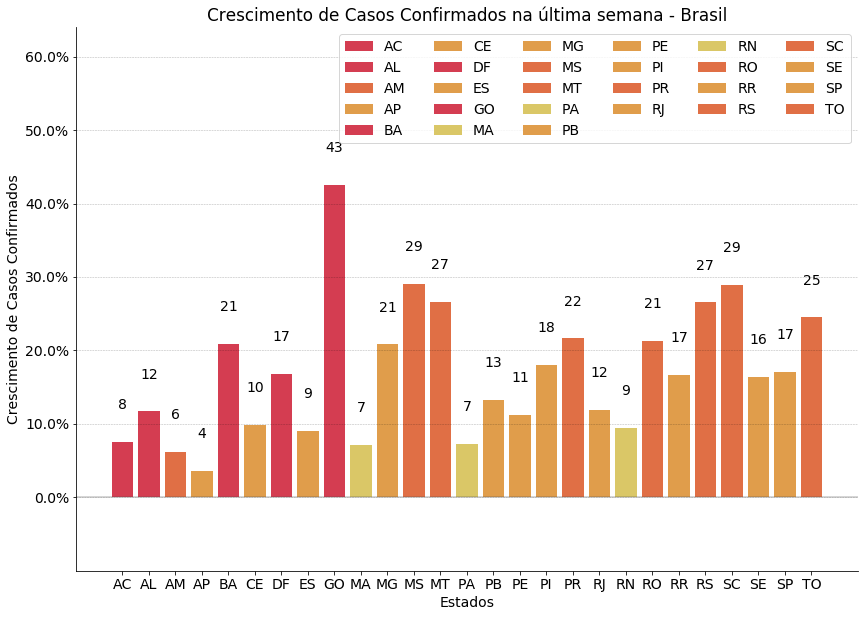

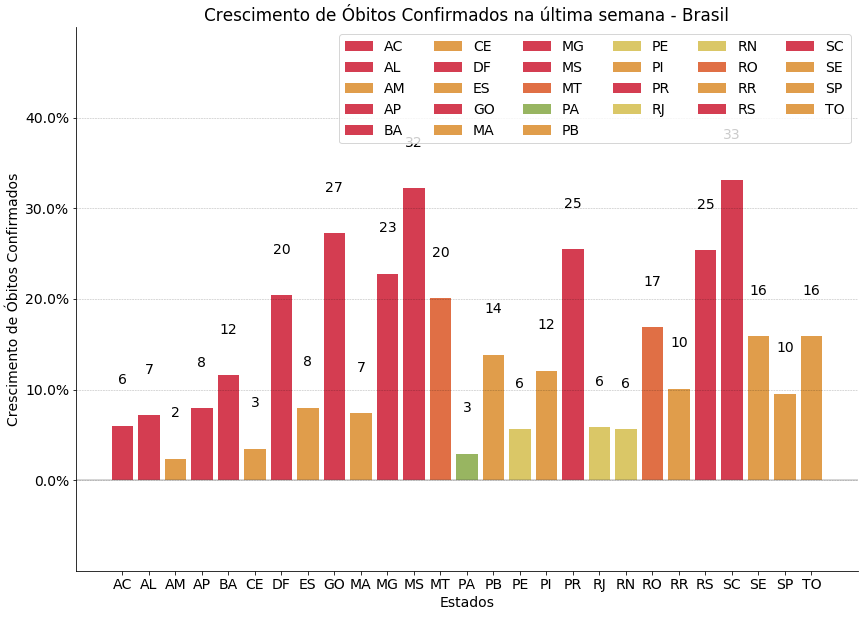

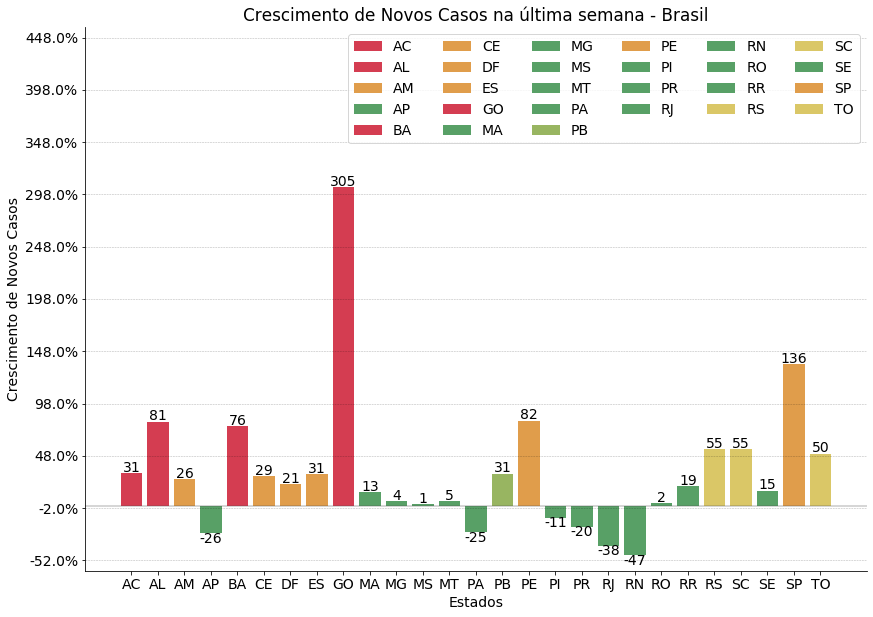

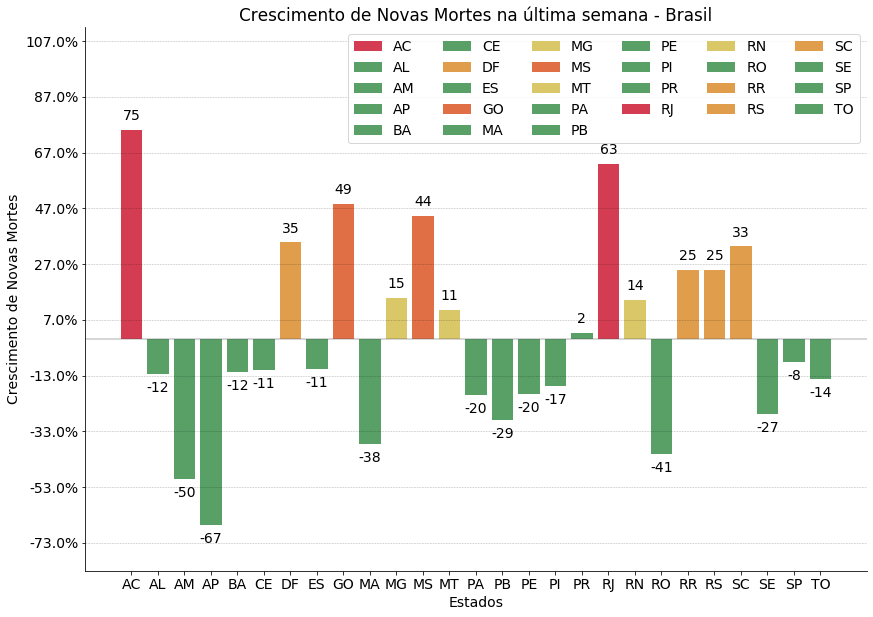

In [21]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

for f in range(6, 10) :
        
    plt.rc('font', size=14)
    plt.rcParams['figure.figsize'] = [14, 10]

    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()    
    plt.gca().get_yaxis().tick_left()
    plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)


    estados = list(df_estados.loc[df_estados['is_last'],['state']
                                 ].sort_values('state', ascending = True)['state'].unique())

    yr_max = 0
    yr_min = 0

    for e in range(27) :      
        y = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                   :].sort_values('day', ascending = True).iloc[:-1, f].tail(7))
        yl = np.median(df_estados.loc[(df_estados['state'] == estados[e]), 
                                   :].sort_values('day', ascending = True).iloc[:-8, f].tail(7))    
        
        if yl != 0 :
            yr = (100 * y / yl) - 100
        else : 
            yr = (10 * y / 1) - 10
            if yr == 0 :
                yr = 1

        if yr > yr_max :
            yr_max = yr
        if yr < yr_min :
            yr_min = yr
        
        ratio = yr / yr_max
        
        if ratio < .0625 :
            plt.bar(estados[e], yr, label = estados[e], color = color2[-11])
        elif (ratio >= .0625) & (ratio < .125) :   
            plt.bar(estados[e], yr, label = estados[e], color = color2[-9])
        elif (ratio >= .125) & (ratio < .25) :
            plt.bar(estados[e], yr, label = estados[e], color = color2[-7])
        elif (ratio >= .25) & (ratio < .5) :
            plt.bar(estados[e], yr, label = estados[e], color = color2[-5])
        elif (ratio >= .5) & (ratio < .75) :
             plt.bar(estados[e], yr, label = estados[e], color = color2[-3])
        else  :
            plt.bar(estados[e], yr, label = estados[e], color = color2[-1])
        
        if yr != 0 :   
            plt.text(estados[e], yr + 5 * (yr / abs(yr)), str(int(round(yr))), color = 'black', 
                     fontsize = 14, horizontalalignment = 'center', verticalalignment = 'center')
        else :
            plt.text(estados[e], 5, str(int(round(yr))), color = 'black', 
                     fontsize = 14, horizontalalignment = 'center', verticalalignment = 'center')
            
    plt.ylim(round(yr_min * 1.1) - 10, round(yr_max * 1.5))    
    
    if f in [6, 7] :
        plt.yticks(np.arange(0, round(yr_max * 1.5), 10), 
                   [str(x) + "%" for x in np.arange(round(yr_min * 1.1), round(yr_max * 1.5), 10)], fontsize = 14)
    elif f in [9] :
        plt.yticks(np.arange(round(yr_min * 1.1), round(yr_max * 1.5), 20), 
                   [str(x) + "%" for x in np.arange(round(yr_min * 1.1), round(yr_max * 1.5), 20)], fontsize = 14)
    else :
        plt.yticks(np.arange(round(yr_min * 1.1), round(yr_max * 1.5), 50), 
                   [str(x) + "%" for x in np.arange(round(yr_min * 1.1), round(yr_max * 1.5), 50)], fontsize = 14)
        
    plt.axhline(color = (.3, .3, .3, .3), lw = 1.5)
    plt.title("Crescimento de " + label[f] + " na última semana - Brasil")
    plt.legend(ncol = 6)
    plt.xlabel('Estados')
    plt.ylabel('Crescimento de ' + label[f])
    plt.savefig('Graphics/' + label[f] + " semana.png")
    plt.show()

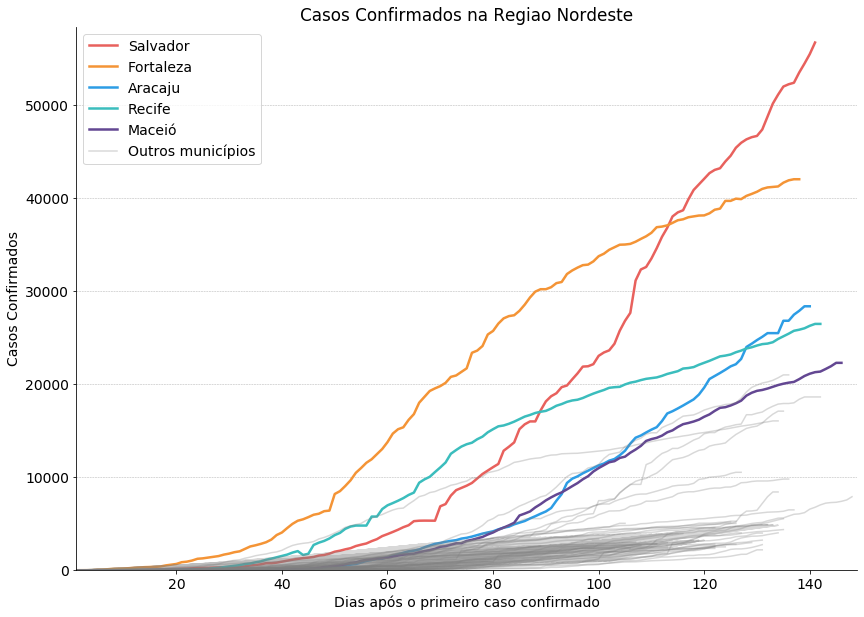

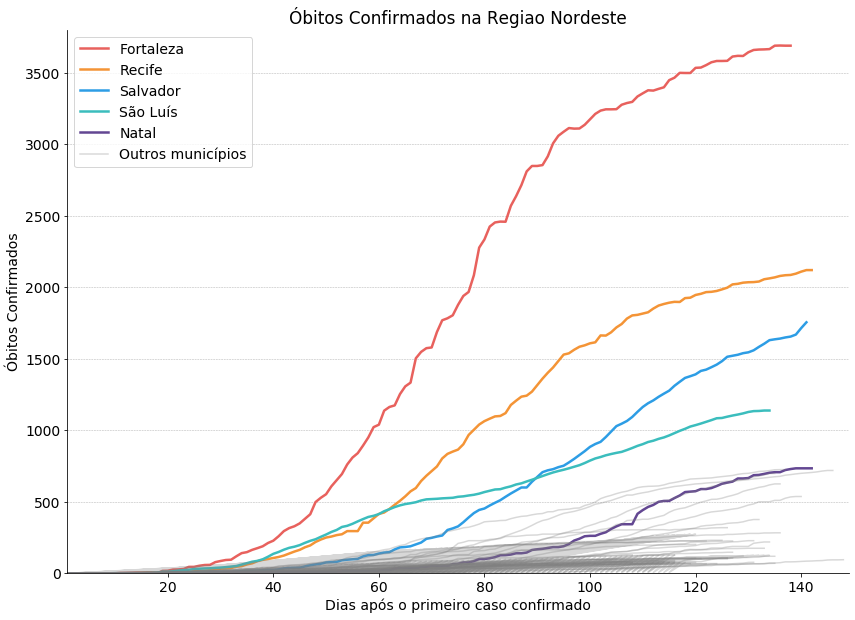

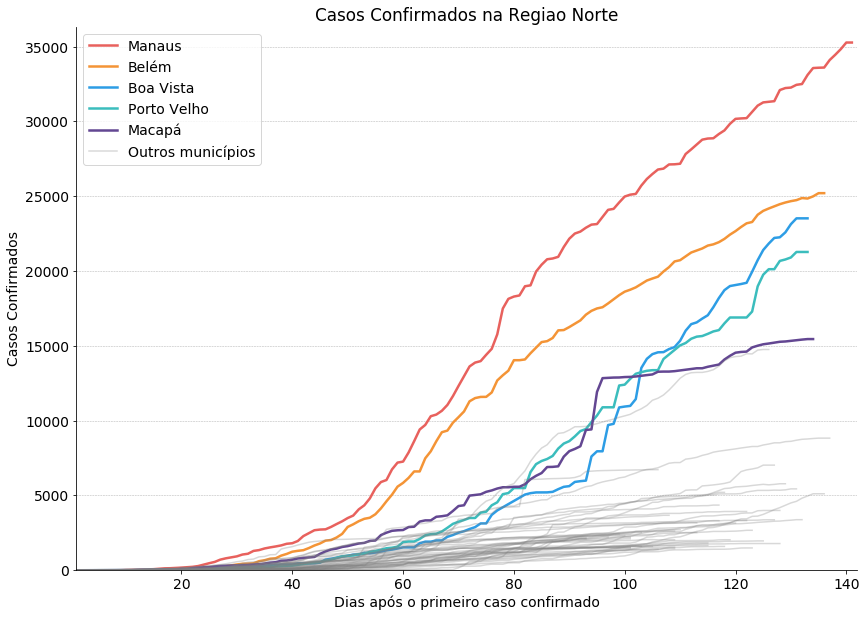

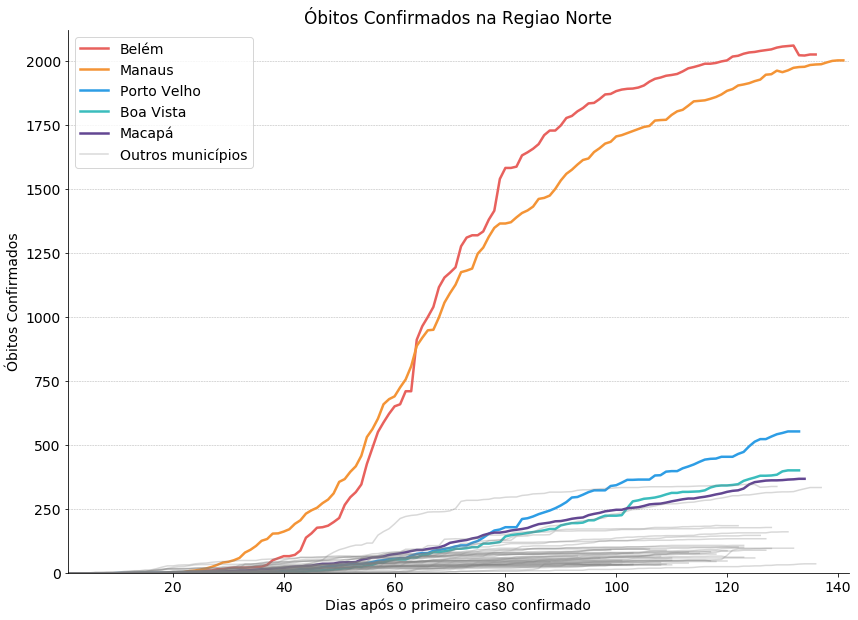

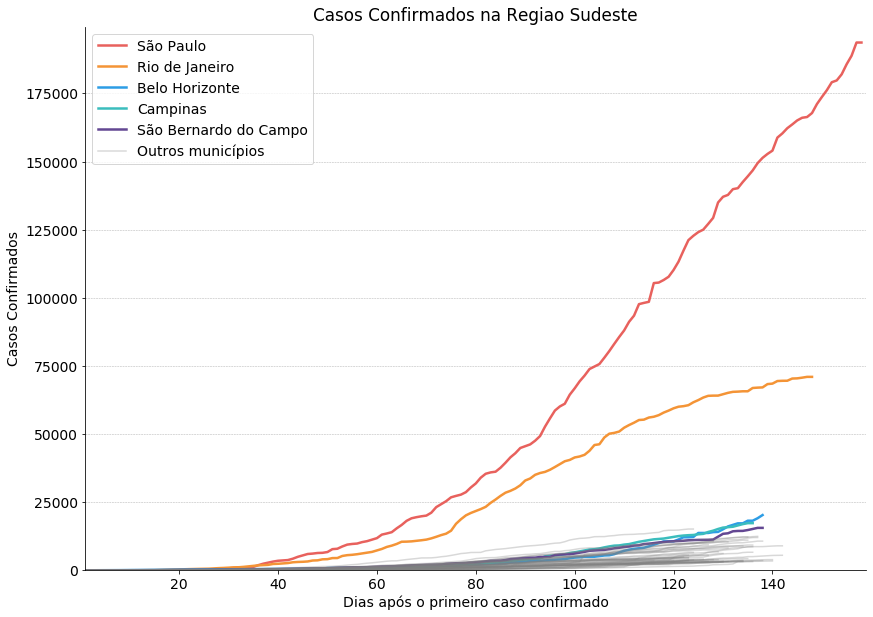

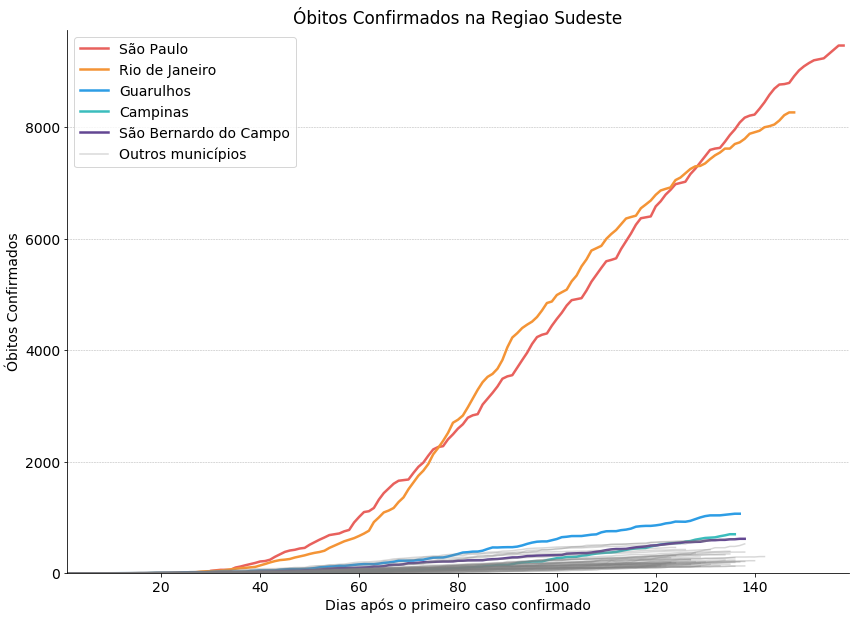

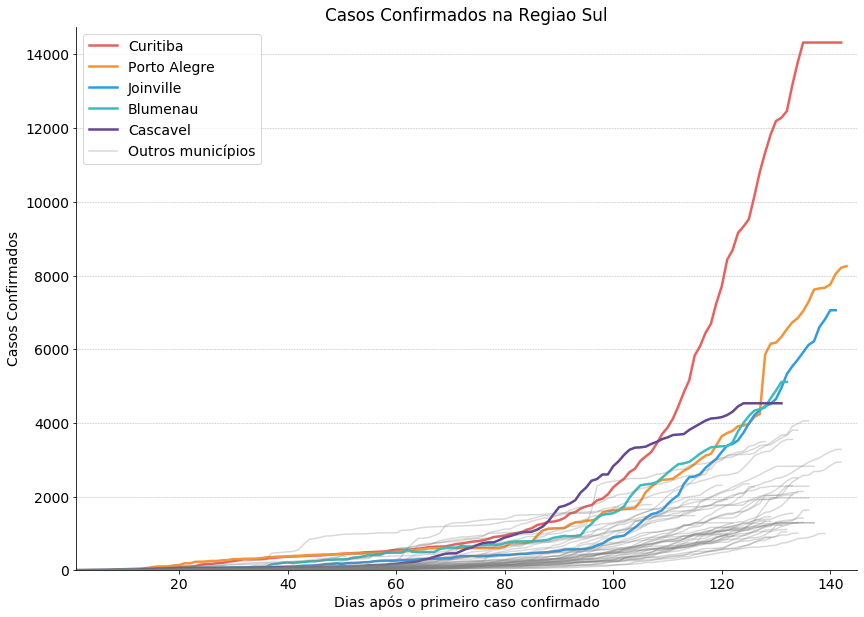

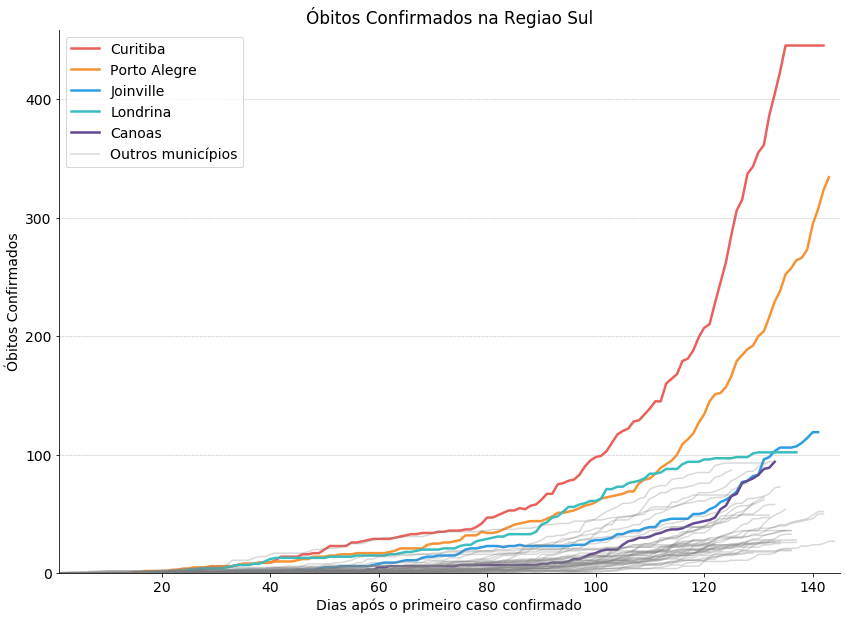

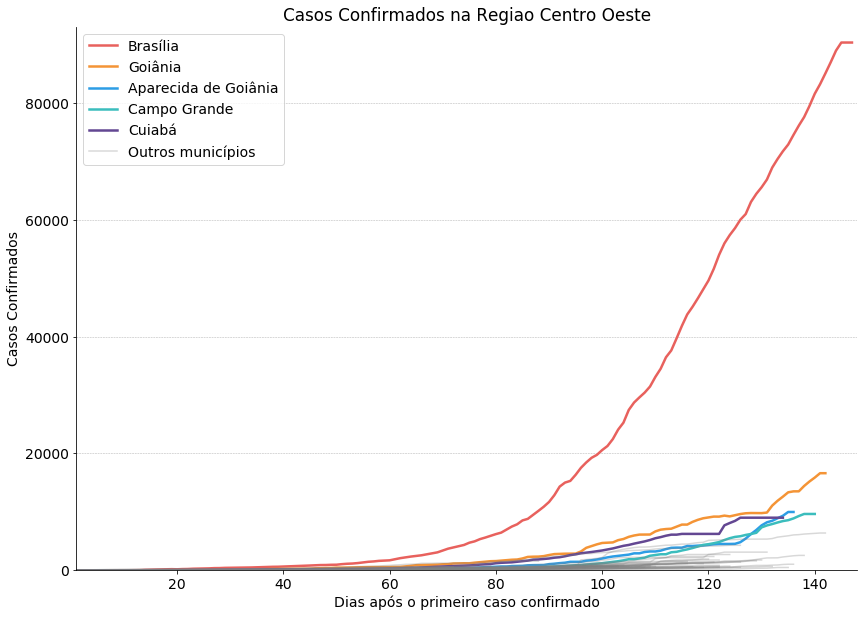

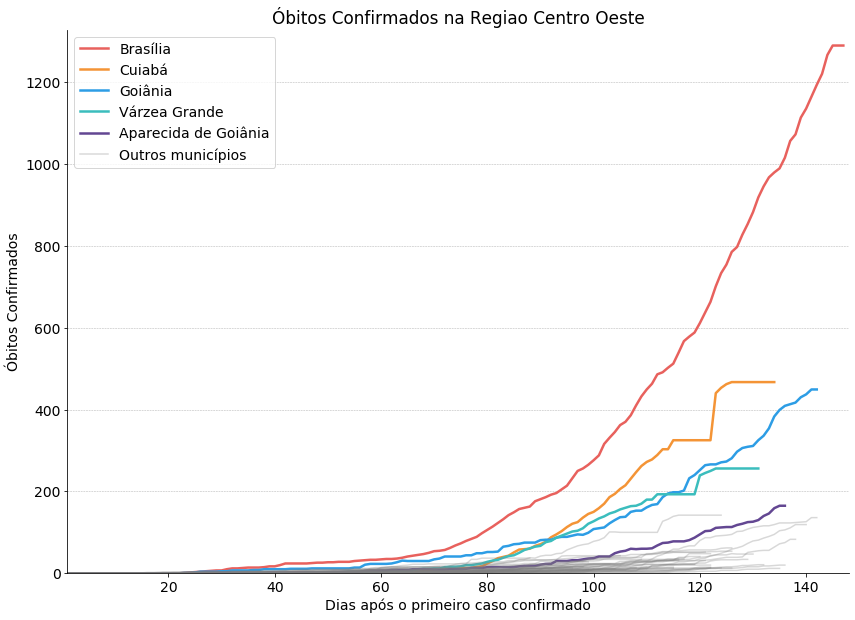

In [22]:
label = ["Cidade", "Estado", "Região", "População", "Último dado", "Data", "dia", "Casos Confirmados", 
           "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

reg = ['Nordeste', 'Norte', 'Sudeste', 'Sul', 'Centro Oeste']

for r in range(5) :
    for f in range(7, 9) :     
        plt.rc('font', size = 14)
        plt.rcParams['figure.figsize'] = [14, 10]
        plt.tick_params(axis = "both", which = "both", bottom = "off", top = "off",    
                        labelbottom = "on", left = "off", right = "off", labelleft = "on")
        
        plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)
        plt.gca().spines["top"].set_visible(False)    
        plt.gca().spines["right"].set_visible(False)
        plt.gca().get_xaxis().tick_bottom()    
        plt.gca().get_yaxis().tick_left()
        
        dia = max(df_cidades[(df_cidades['region'] == reg[r])].loc[:, 'day'])
        
        x_max = dia
        y_max = 0
        
        Regiao_c = list(df_cidades[(df_cidades['region'] == reg[r]) &
                           (df_cidades['is_last'])].sort_values(df_cidades.columns[f],
                                                                ascending = False)['city'].unique())

        y_max = max(df_cidades.loc[(df_cidades['region'] == reg[r]) &
                                    (df_cidades['city'] == Regiao_c[0]), df_cidades.columns[f]])
        y_med = max(df_cidades.loc[(df_cidades['region'] == reg[r]) &
                                    (df_cidades['city'] == Regiao_c[1]), df_cidades.columns[f]])
        y_min = max(df_cidades.loc[(df_cidades['region'] == reg[r]) &
                                    (df_cidades['city'] == Regiao_c[5]), df_cidades.columns[f]])

        for c in range(len(Regiao_c)) : 
            # Real data
            x = list(df_cidades.loc[(df_cidades['region'] == reg[r]) & 
                                    (df_cidades['city'] == Regiao_c[c]), 'day'])
            y = list(df_cidades.loc[(df_cidades['region'] == reg[r]) &
                                    (df_cidades['city'] == Regiao_c[c]), df_cidades.columns[f]])

            if (c > 5) & (c < 50) :
                plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .3), lw = 1.5)
            elif c == 5 :
                plt.plot(x, y, marker = ' ', label = 'Outros municípios', color = (.5, .5, .5, .3), lw = 1.5)
            elif (c >= 2) & (c < 5) :
                plt.plot(x, y, marker = ' ', label = Regiao_c[c], color = color[c], lw = 2.5)
                ys = y_min + (y_med - y_min) / c
                #plt.text(x_max * 1.01, ys, Regiao_c[c], color = color[c], fontsize = 14)
            elif (c < 2):
                plt.plot(x, y, marker = ' ', label = Regiao_c[c], color = color[c], lw = 2.5)
                #plt.text(x_max * 1.01, y[-1] * 1.01, Regiao_c[c], color = color[c], fontsize = 14)
                

        plt.xlim(1, x_max + 1)
        plt.ylim(0, y_max * 1.03)
        plt.xlabel("Dias após o primeiro caso confirmado")
        plt.title(label[f] + " na Regiao " + reg[r])
        plt.legend(loc = 2)
        plt.ylabel(label[f])
        plt.savefig('Graphics/' + label[f] + " - " + reg[r] + ".png")
        plt.show()

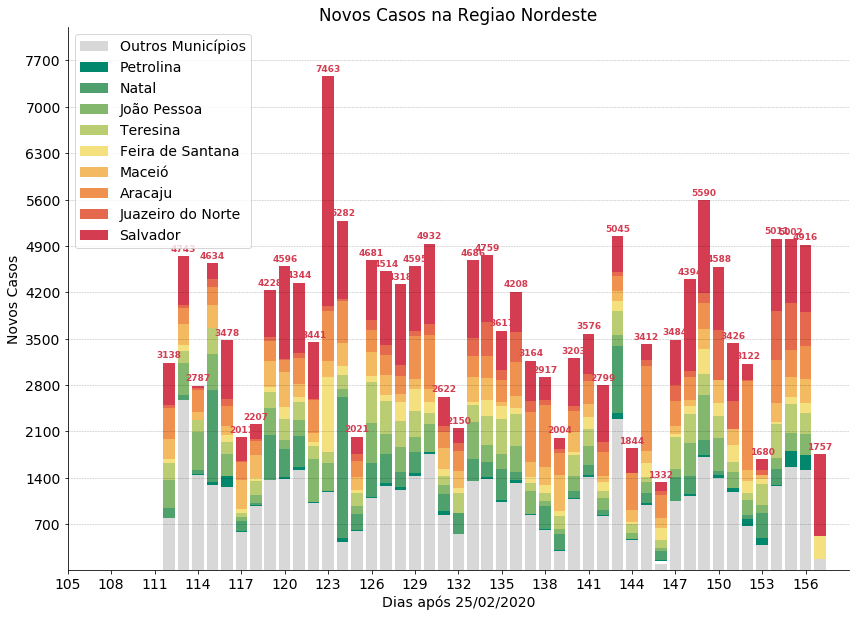

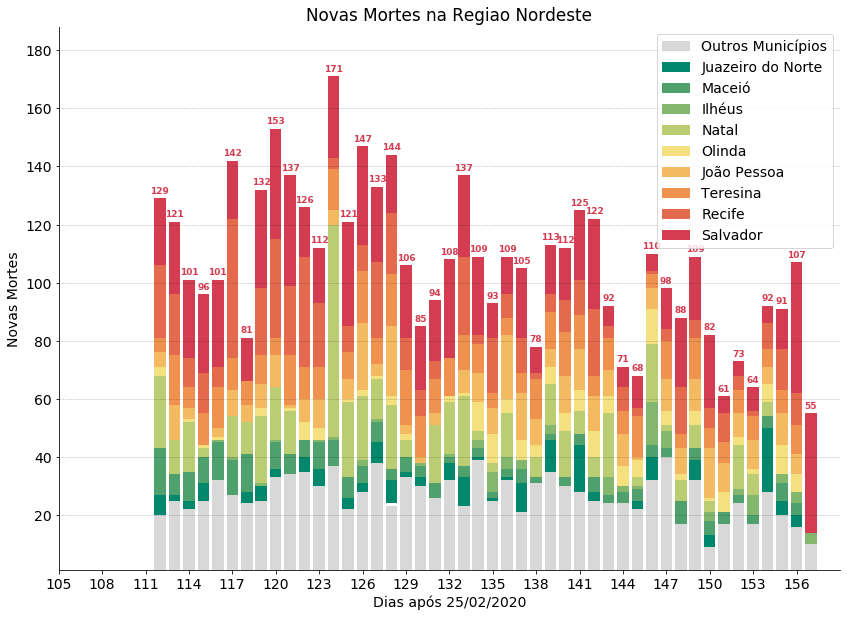

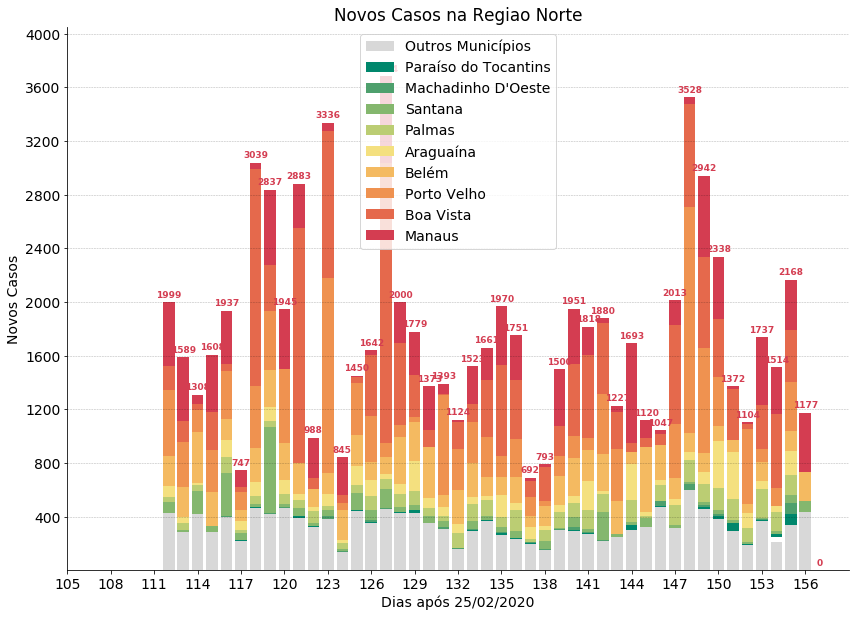

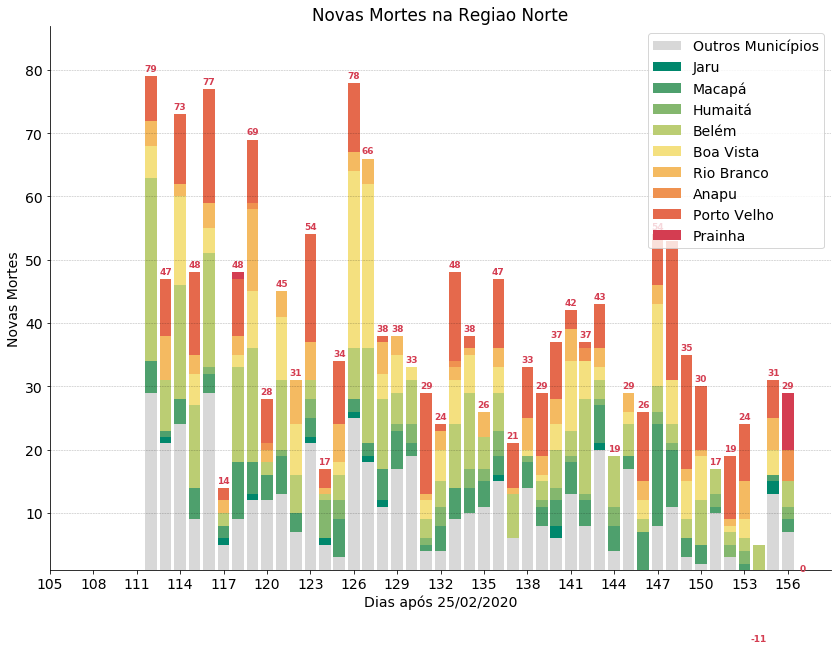

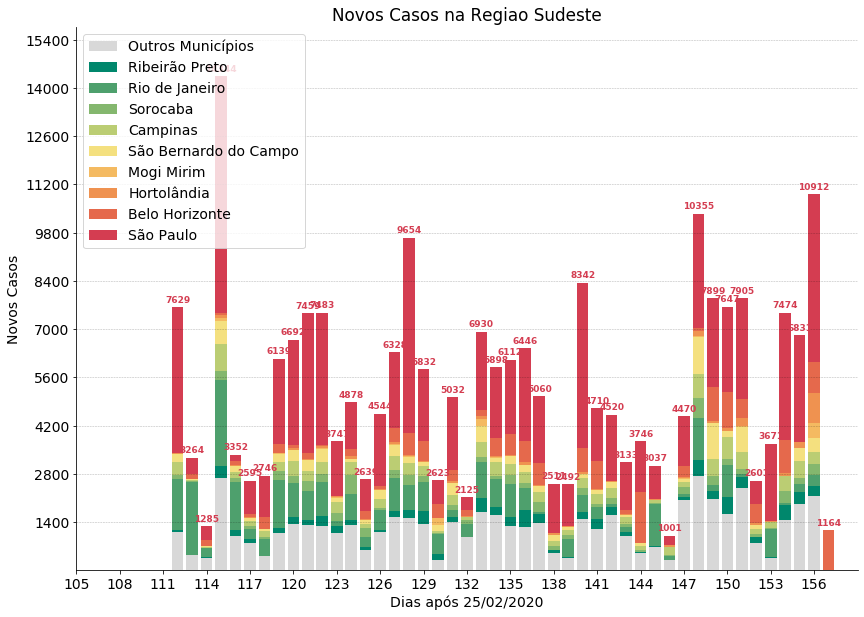

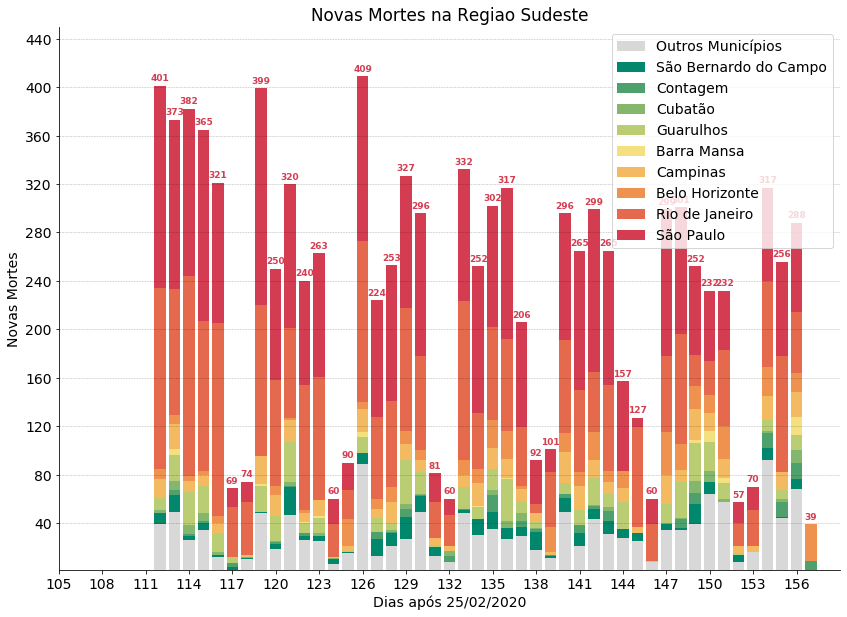

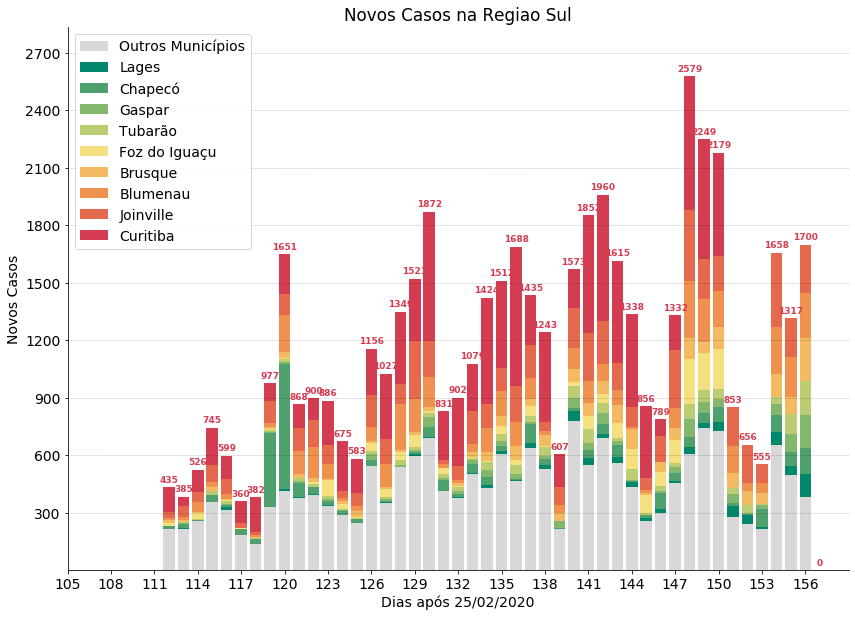

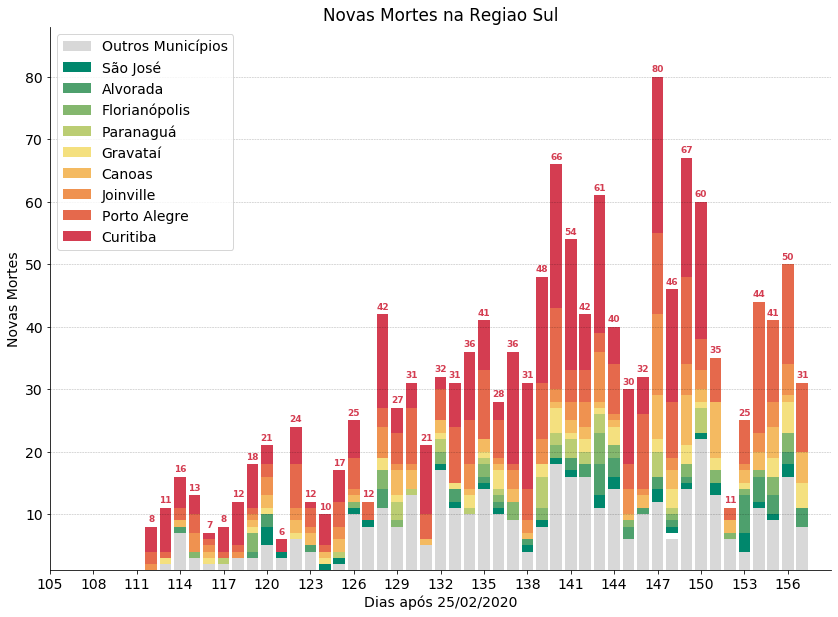

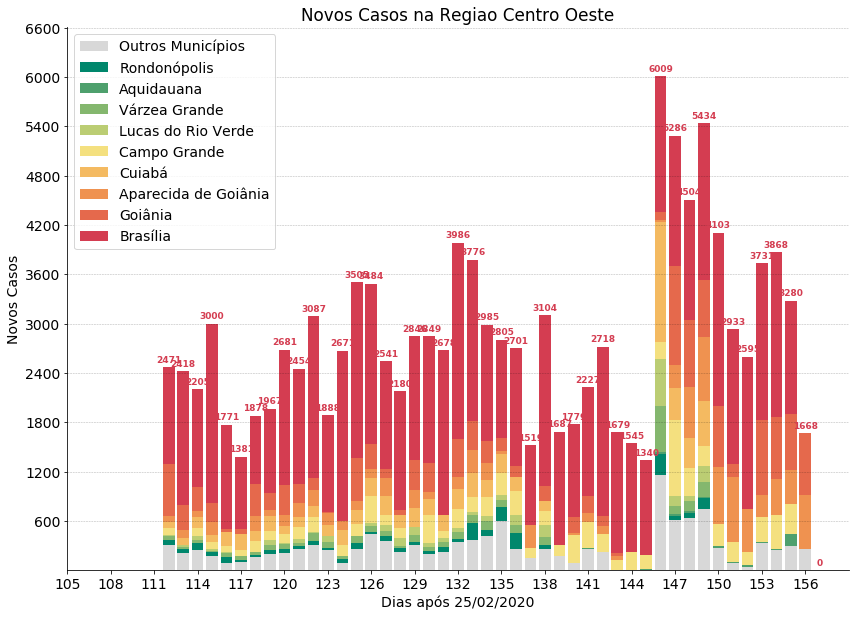

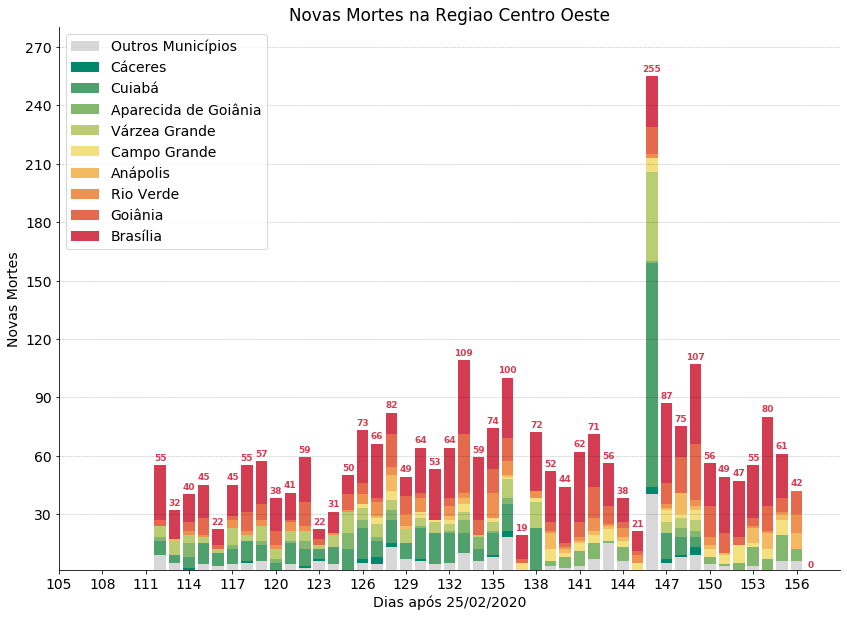

In [23]:
label = ["Cidade", "Estado", "Região", "População", "Último dado", "Data", "dia", "Casos Confirmados", 
           "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

reg = ['Nordeste', 'Norte', 'Sudeste', 'Sul', 'Centro Oeste']

dia = len(df_Brasil.index)

for r in range(5) :
    for f in range(9, 11) :          
        plt.rc('font', size = 14)
        plt.rcParams['figure.figsize'] = [14, 10]
        plt.tick_params(axis = "both", which = "both", bottom = "off", top = "off",    
                        labelbottom = "on", left = "off", right = "off", labelleft = "on")
        
        plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)
        plt.gca().spines["top"].set_visible(False)    
        plt.gca().spines["right"].set_visible(False)
        plt.gca().get_xaxis().tick_bottom()    
        plt.gca().get_yaxis().tick_left()

        Regiao_c = list(df_cidades[(df_cidades['region'] == reg[r]) & (df_cidades['is_last'])
                                  ].sort_values(df_cidades.columns[f], ascending = True)['city'].unique())

        #c_num = [[21, 21, 21, 15, 15], [15, 15, 21, 15, 15]]
        first = len(Regiao_c) - 18#c_num[f - 9][r]
      
        x_min = dia
        
        for a in range(first, len(Regiao_c)) :
            temp = len(list(df_cidades.loc[(df_cidades['region'] == reg[r]) & (df_cidades['city'] == Regiao_c[a]), 
                                       df_cidades.columns[f]]))
            if temp < x_min :
                x_min = temp
            if x_min > 46 :
                x_min = 46

        x_max = dia + 1
        y_max = 0

        x = list(range(dia - x_min, dia))
        
        prev = list(df_cidades.loc[(df_cidades['region'] == reg[r]) &
                                   (df_cidades['city'] == Regiao_c[first]), 
                                   df_cidades.columns[f]].tail(x_min).reset_index(drop = True))

        for c in range(first, len(Regiao_c)) : 
            if c == first :
                plt.bar(x, prev, label = 'Outros Municípios', color = (.5, .5, .5, .3))
                yfirst = prev
                
            y = list(df_cidades.loc[(df_cidades['region'] == reg[r]) & (df_cidades['city'] == Regiao_c[c]),
                                    df_cidades.columns[f]].tail(x_min).reset_index(drop = True))                  
                
            if c == len(Regiao_c) - len(color3):    
                plt.bar(x, prev, bottom = yfirst, color = (.5, .5, .5, .3))
            if c >= len(Regiao_c) - len(color3):
                plt.bar(x, y, bottom = prev, label = Regiao_c[c], color = color3[c - len(Regiao_c)])
                
                
            
            prev = [sum(i) for i in zip(y, prev)]

            if max(prev) > y_max :
                y_max = max(prev)
                
        for i, v in enumerate(prev):
            plt.text(i + (dia - x_min), v + (y_max * 0.01), str(v), color = color3[c - len(Regiao_c)],
                     fontsize = 9, fontweight = 'bold', horizontalalignment = 'center')
        
        plt.xticks(np.arange(dia - x_min - 7, x_max, 3))
        ytick = round(y_max * .001) * 100
        
        if ytick == 0 :
            ytick = round(y_max * .01) * 10
            if ytick == 0 :
                ytick = 1
            
        plt.yticks(np.arange(0, y_max * 1.1, ytick))   

        plt.xlim(dia - x_min - 7, x_max)
        plt.ylim(1, y_max * 1.1)
        plt.title(label[f] + " na Regiao " + reg[r])
        plt.xlabel("Dias após 25/02/2020")
        plt.legend()
        plt.ylabel(label[f])
        plt.savefig('Graphics/' + label[f] + " - " + reg[r] + ".png")
        plt.show()

df_hoje = df1.loc[(df["is_last"] == True), :].drop(['date', 'is_last'], axis = 1)
df_hoje = df_hoje.loc[(df_hoje["place_type"] == 'city'), :]
df_hoje = df_hoje.loc[(df_hoje["city"] != 'Importados/Indefinidos'), :]
df_hoje['city_ibge_code'] = df_hoje['city_ibge_code'].astype(int).astype(str)

m = folium.Map(
    name = 'COVID19 Brasil',
    width = 800, height = 500,
    location = [-15.77972, -47.92972], #[-7, -36.75], # centro paraiba 
    zoom_start = 4,
    min_zoom = 3,
    max_zoom = 18,
    tiles = 'Mapbox Bright'#'cartodbpositron'
)

m.choropleth(
    geo_data = geo,
    name = 'Casos Confirmados',
    data = df_hoje,
    columns = ['city_ibge_code', 'confirmed'],
    key_on = 'feature.properties.id',
    fill_color = 'YlOrRd',
    fill_opacity = 0.7,
    nan_fill_color = 'gray',
    nan_fill_opacity = 0.1,
    line_opacity = 0.0,
    legend_name = 'Casos Confirmados',
    legend_fontsize = '14',
    bins = [0, 10, 100, 1000, 10000, 100000]
)

m.choropleth(
    geo_data = geo,
    name = 'Óbitos Confirmados',
    data = df_hoje,
    columns = ['city_ibge_code', 'deaths'],
    key_on = 'feature.properties.id',
    fill_color = 'Reds',
    fill_opacity = 0.7,
    nan_fill_color = 'gray',
    nan_fill_opacity = 0.1,
    line_opacity = 0.0,
    legend_name = 'Óbitos Confirmados',
    legend_fontsize = '14',
    bins = [0, 1, 10, 100, 1000, 10000],
    show = False
)

m.choropleth(
    geo_data = geo,
    name = 'Casos Confirmados por 100 mil habitantes',
    data = df_hoje,
    columns = ['city_ibge_code', 'incidence'],
    key_on = 'feature.properties.id',
    fill_color = 'PuRd',
    fill_opacity = 0.7,
    nan_fill_color = 'gray',
    nan_fill_opacity = 0.1,
    line_opacity = 0.0,
    legend_name = 'Casos Confirmados por 100 mil habitantes',
    legend_fontsize = '14',
    bins = [0, 1, 10, 100, 1000, 2000],
    show = False
)

bins = list(df_hoje['death_rate'].quantile([0, .125, .25, .375, .5, .625, .75, .875, 1]))
m.choropleth(
    geo_data = geo,
    name = 'Mortalidade',
    data = df_hoje,
    columns = ['city_ibge_code', 'death_rate'],
    key_on = 'feature.properties.id',
    fill_color = 'RdPu',
    fill_opacity = 0.7,
    nan_fill_color = 'gray',
    nan_fill_opacity = 0.1,
    line_opacity = 0.0,
    legend_name = 'Mortalidade',
    legend_fontsize = '14',
    bins = bins,
    show = False
)
folium.LayerControl(name = 'COVID19 Brasil').add_to(m)

m.save('mapa.html')
m

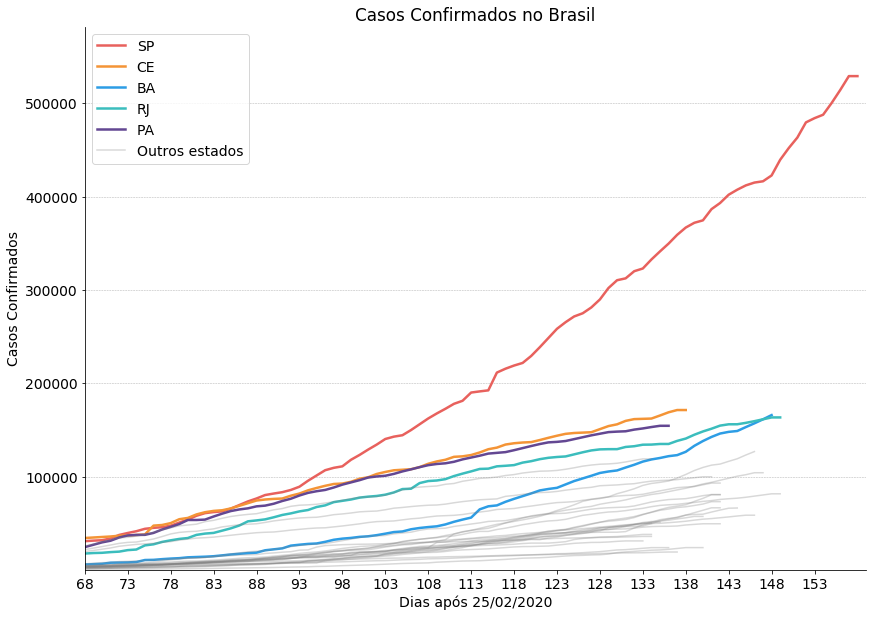

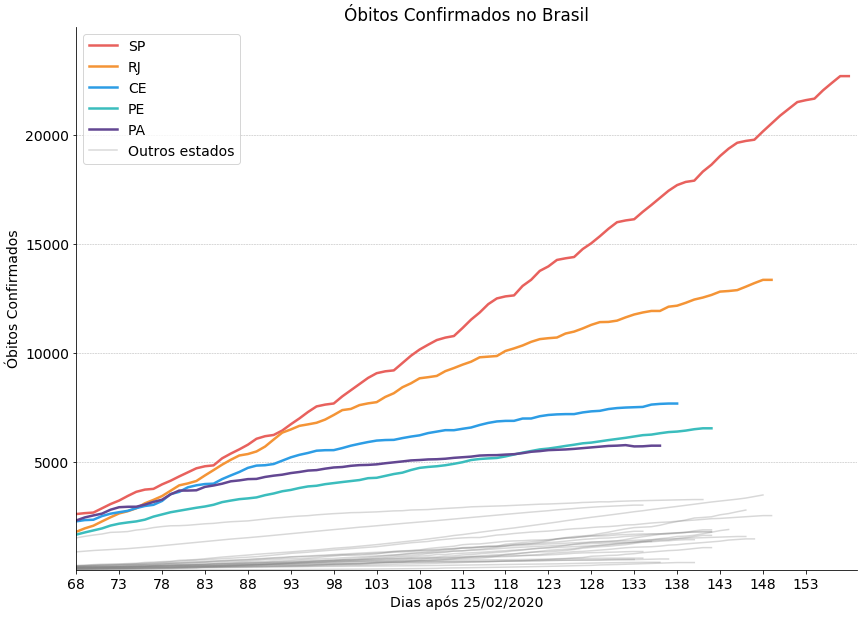

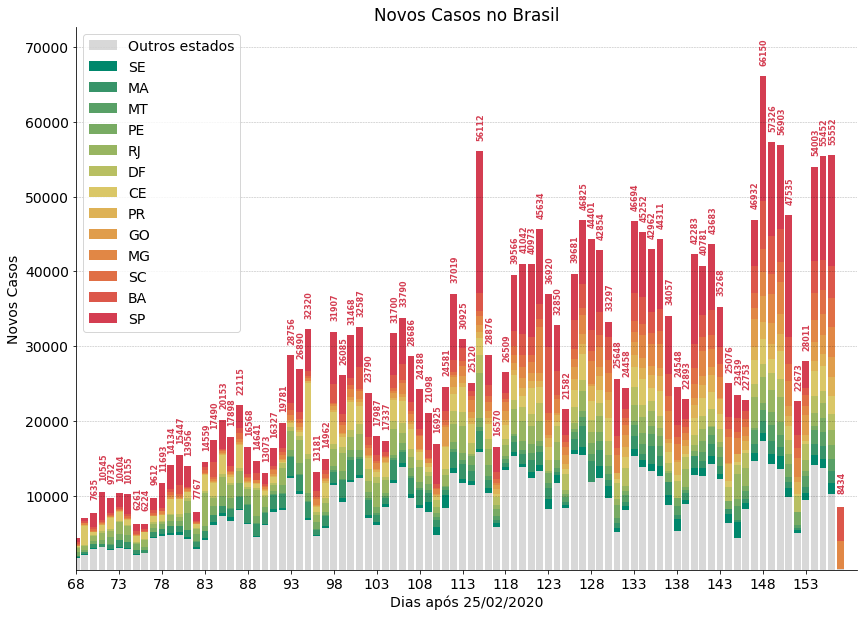

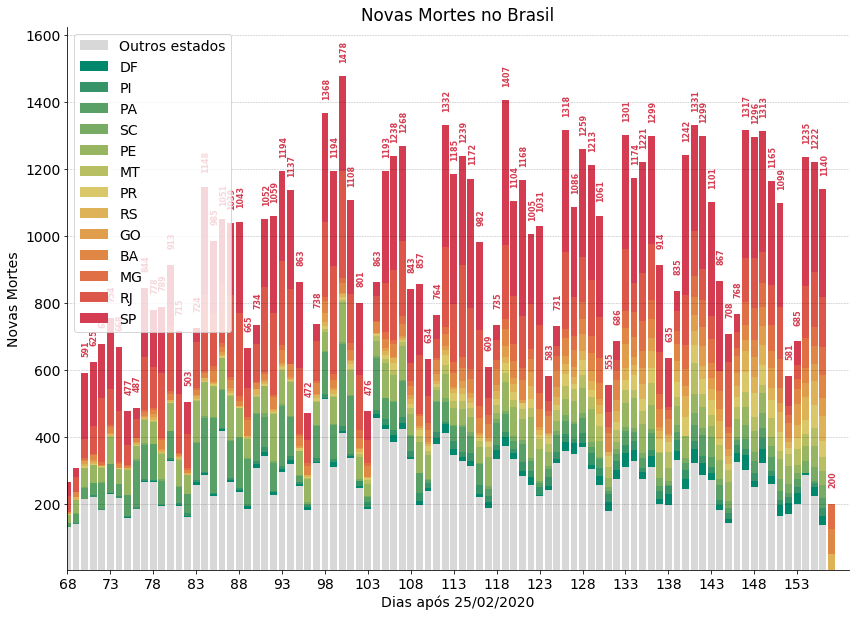

In [24]:
label = ["Estado", "Região", "População", "Último Dado", 'Data', "Dia", "Casos Confirmados", "Óbitos Confirmados",
         "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]
reg = ['Nordeste', 'Norte', 'Sudeste', 'Sul', 'Centro Oeste']

for f in range(6, 10) :
    
    dia = max(df_estados.loc[:, 'day'])
    x_max = dia
    
    plt.rc('font', size = 14)
    plt.rcParams['figure.figsize'] = [14, 10]
    plt.tick_params(axis = "both", which = "both", bottom = "off", top = "off",    
                    labelbottom = "on", left = "off", right = "off", labelleft = "on")

    plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)
    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()    
    plt.gca().get_yaxis().tick_left() 

    if f in [6, 7] :
        
        estados = list(df_estados.loc[df_estados['is_last'],
                                      ['state', df_estados.columns[f]]
                                     ].sort_values(df_estados.columns[f], ascending = False)['state'].unique())

        y_max = 0
        
        for e in range(27) :
            # Real data
            x = list(df_estados.loc[df_estados['state'] == estados[e], 'day'])
            y = list(df_estados.loc[df_estados['state'] == estados[e], df_estados.columns[f]])

            y_max = max(df_estados.loc[df_estados['state'] == estados[0], df_estados.columns[f]])
            y_med = max(df_estados.loc[df_estados['state'] == estados[1], df_estados.columns[f]])
            y_min = max(df_estados.loc[df_estados['state'] == estados[5], df_estados.columns[f]])

            ytab = [1.01, 1.1, 1, 1, .8]

            if (e > 5) :
                plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .3), lw = 1.5)
            elif e == 5 :
                plt.plot(x, y, marker = ' ', label = 'Outros estados', color = (.5, .5, .5, .3), lw = 1.5)
            elif (e >= 2) & (e < 5) :
                plt.plot(x, y, marker = ' ', label = estados[e], color = color[e], lw = 2.5)
                ys = y_min + (y_med - y_min) / e
                #plt.text(x_max * 1.01, ys, estados[e], color = color[e], fontsize = 14)
            elif (e < 2):
                plt.plot(x, y, marker = ' ', label = estados[e], color = color[e], lw = 2.5)
                #plt.text(x_max * 1.01, y[-1] * 1.01, estados[e], color = color[e], fontsize = 14)
            
            plt.xticks(np.arange(x_max - 90, x_max, 5))
            plt.xlim(x_max - 90, x_max + 1)
            plt.ylim(1, y_max * 1.1)
            
    else :   
        estados = list(df_estados.loc[df_estados['is_last'], 
                                      ['state', df_estados.columns[f]]
                                     ].sort_values(df_estados.columns[f], ascending = True)['state'].unique())
        
        x_max = len(df_Brasil.index)
        y_max = max(df_Brasil.iloc[range(len(df_Brasil.index)), f - 6])
        
        x = list(range(dia - 90, len(df_Brasil.index)))
        y = list(df_estados.loc[df_estados['state'] == estados[0],
                                df_estados.columns[f]].tail(90).reset_index(drop = True))

        prev = y

        for e in range(1, 27) : 
            y = list(df_estados.loc[df_estados['state'] == estados[e], 
                                    df_estados.columns[f]].tail(90).reset_index(drop = True))               

            for r in range(len(Regiao)) :    
                if estados[e] in Regiao[r] :
                    if e == 14 :
                        plt.bar(x, prev, label = 'Outros estados', color = (.5, .5, .5, .3))
                    if e > 13 :  
                        plt.bar(x, y, bottom = prev, label = estados[e], color = color2[e - 14])
            prev = [sum(i) for i in zip(y, prev)]
        
        for i, v in enumerate(prev):
            if i > 1 :
                plt.text(i + dia - 89.85, v + (y_max * 0.05), str(v), color = color2[-1], rotation = 'vertical', 
                         fontsize = 8, fontweight = 'bold', horizontalalignment = 'center', verticalalignment = 'center')
        
        plt.xticks(np.arange(x_max - 90, x_max, 5))
        plt.xlim(x_max - 90, x_max + 1)
        plt.ylim(1, y_max * 1.1) 
                
    plt.title(label[f] + " no Brasil")
    plt.legend(loc = 2)   
    #plt.yscale('log')
    plt.xlabel("Dias após 25/02/2020")
    plt.ylabel(label[f])
    plt.savefig('Graphics/' + label[f] + " Brasil.png")
    plt.show()

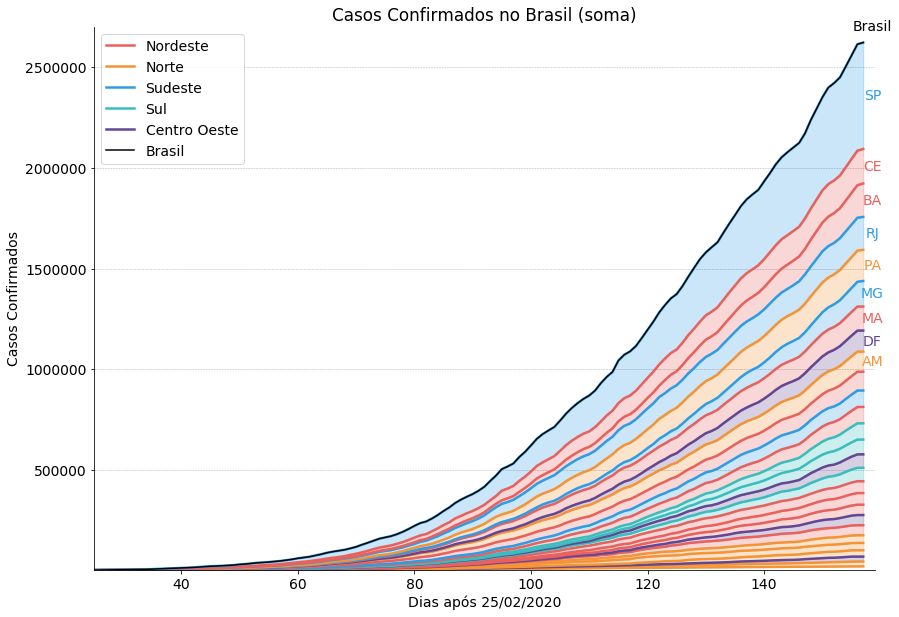

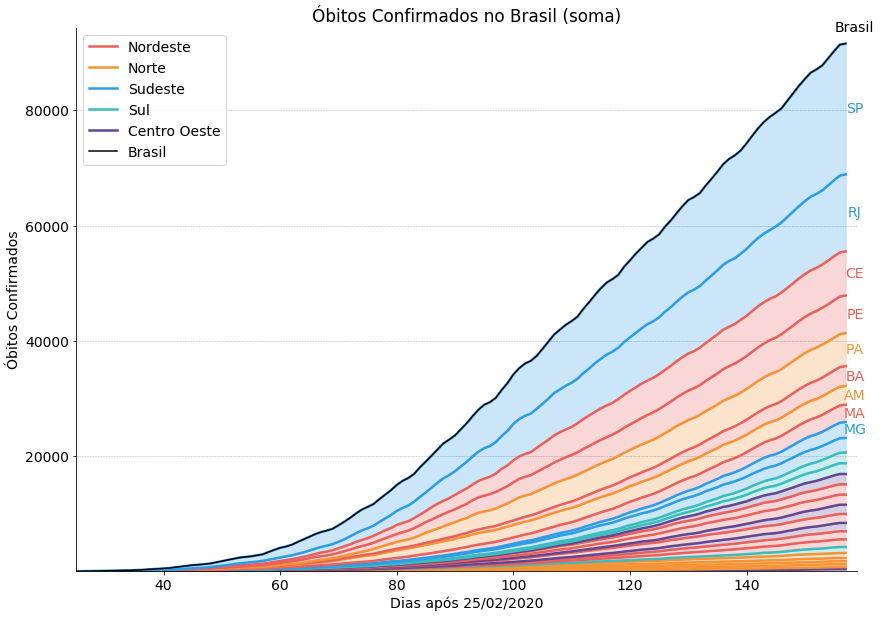

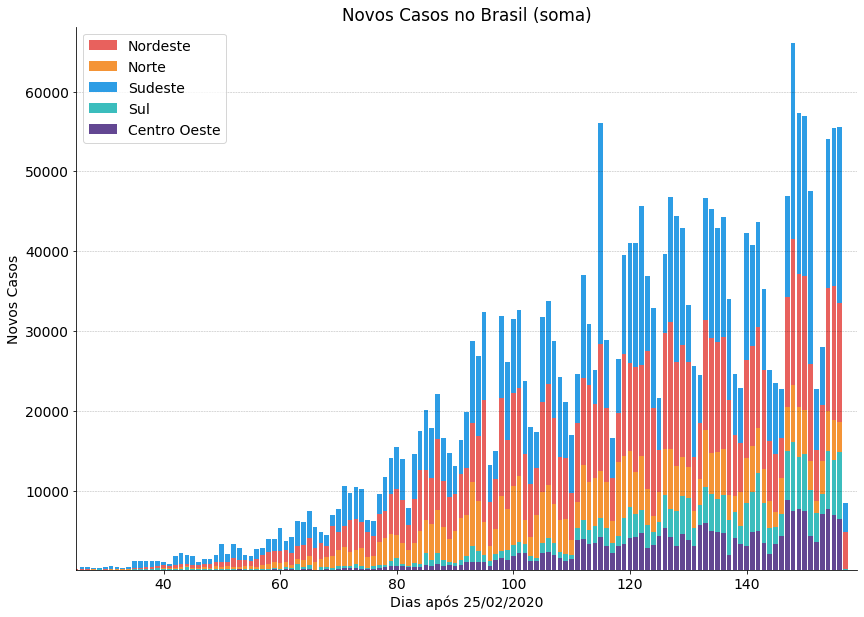

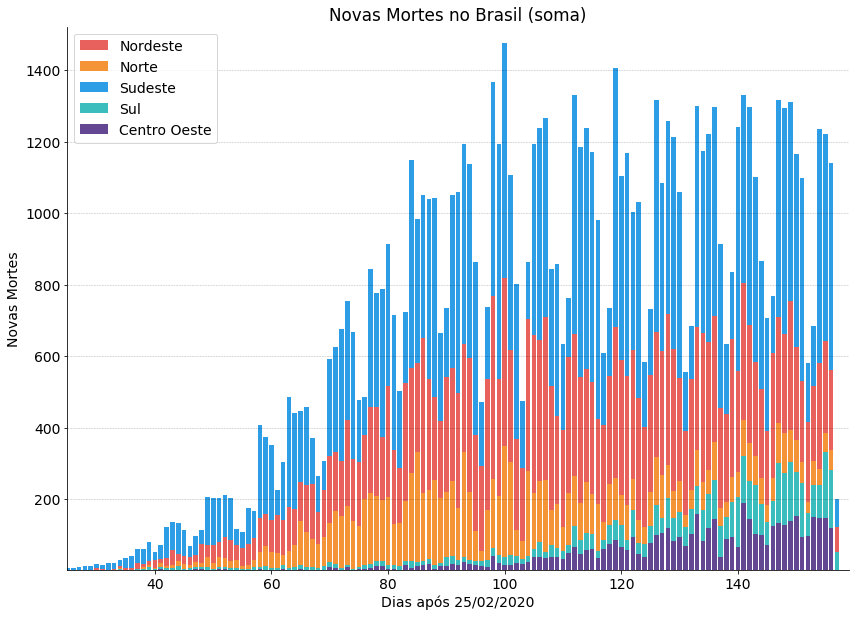

In [25]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

for f in range(6, 10) :
        
    plt.rc('font', size=14)
    plt.rcParams['figure.figsize'] = [14, 10]

    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()    
    plt.gca().get_yaxis().tick_left()
    plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)
    
    if f in [6, 7] :
        dia = max(df_estados.loc[:, 'day'])
        
        reg = ['Nordeste', 'Norte', 'Sudeste', 'Sul', 'Centro Oeste']
        estados = list(df_estados.loc[df_estados['is_last'],
                                      [df_estados.columns[f], 'state']
                                     ].sort_values(df_estados.columns[f], ascending = True)['state'].unique())
        
        x_max = dia
        y_max = max(df_Brasil.iloc[range(len(df_Brasil.index)), f - 6])
        
        # Brasil data
        x = range(25, len(df_Brasil.index))
        y = list(df_estados.loc[df_estados['state'] == estados[0], 
                                df_estados.columns[f]
                               ].tail(dia - 25).reset_index(drop = True))

        for r in range(len(Regiao)) :
            plt.plot(range(5), range(5), label = reg[r], color = color[r], lw = 2.5)
            if estados[0] in Regiao[r] :
                plt.plot(x, y, marker = ' ', color = color[r], lw = 2.5)     
        temp = list(df_estados.loc[df_estados['state'] == estados[0], 
                                   df_estados.columns[f]
                                  ].tail(dia - 25).reset_index(drop = True))

        for e in range(1, 27) :                  
            tempa = temp
            tempb = list(df_estados.loc[df_estados['state'] == estados[e], 
                                        df_estados.columns[f]
                                       ].tail(dia - 25).reset_index(drop = True))               
            y = [sum(i) for i in zip(temp, tempb)]
            temp = y

            for r in range(len(Regiao)) :    
                if estados[e] in Regiao[r] :
                    plt.plot(x, y, marker = ' ', color = color[r], lw = 2.5)
                    if e > 17 :
                        plt.text(max(x) * 1.01, (max(temp) + max(tempa)) * 0.5, estados[e], color = color[r], fontsize = 14, 
                                 horizontalalignment = 'center', verticalalignment = 'center')
                    plt.fill_between(x, temp, tempa, color = (color[r] + '40'))

        # Brasil data
        x = range(len(df_Brasil.index))
        y = list(df_Brasil.iloc[x, f - 6])
        plt.plot(x, y, color = 'black', label = "Brasil", lw = 1.5) 
        plt.text(max(x) * 1.01, y[-1] * 1.03, "Brasil", color = "black", fontsize = 14,
                 horizontalalignment = 'center', verticalalignment = 'center')               

        plt.xlim(25, x_max + 1)
        plt.ylim(1, y_max * 1.03)
    
    else :
        dia = len(df_Brasil.index)
        
        df_estados['region'] = 'null'
        reg = ['B Nordeste', 'C Norte', 'A Sudeste', 'D Sul', 'E Centro Oeste']
        for r in range(len(Regiao)) :
            for a in range(len(Regiao[r])) :
                df_estados.loc[df_estados['state'].eq(Regiao[r][a]), 'region'] = reg[r]
        
        estados = list(df_estados.loc[df_estados['is_last'],
                                      ['state', 'region']
                                     ].sort_values('region', ascending = False)['state'].unique())
        
        x_max = len(df_Brasil.index)
        y_max = max(df_Brasil.iloc[range(len(df_Brasil.index)), f - 6])
        
        x = list(range(25, len(df_Brasil.index)))
        y = list(df_estados.loc[df_estados['state'] == estados[0], 
                                df_estados.columns[f]
                               ].tail(dia - 25).reset_index(drop = True))

        for r in range(len(Regiao)) :
            plt.bar(range(1), range(1), label = str(reg[r])[2:], color = color[r])
            if estados[0] in Regiao[r] :
                plt.bar(x, y, color = color[r])    

        prev = y

        for e in range(1, 27) :                
            y = list(df_estados.loc[df_estados['state'] == estados[e], 
                                    df_estados.columns[f]
                                   ].tail(dia - 25).reset_index(drop = True))

            for r in range(len(Regiao)) :    
                if estados[e] in Regiao[r] :
                    plt.bar(x, y, bottom = prev, color = color[r])
            prev = [sum(i) for i in zip(y, prev)]
     
        plt.xlim(25, x_max + 1)
        plt.ylim(1, y_max * 1.03)    
        
    plt.title(label[f] + " no Brasil (soma)")
    plt.legend(loc = 2, ncol = 1)
    plt.xlabel("Dias após 25/02/2020")
    plt.ylabel(label[f])
    plt.savefig('Graphics/' + label[f] + " Brasil soma.png")
    plt.show()
    
    reg = ['Nordeste', 'Norte', 'Sudeste', 'Sul', 'Centro Oeste']
    for r in range(len(Regiao)) :
            for a in range(len(Regiao[r])) :
                df_estados.loc[df_estados['state'].eq(Regiao[r][a]), 'region'] = reg[r]

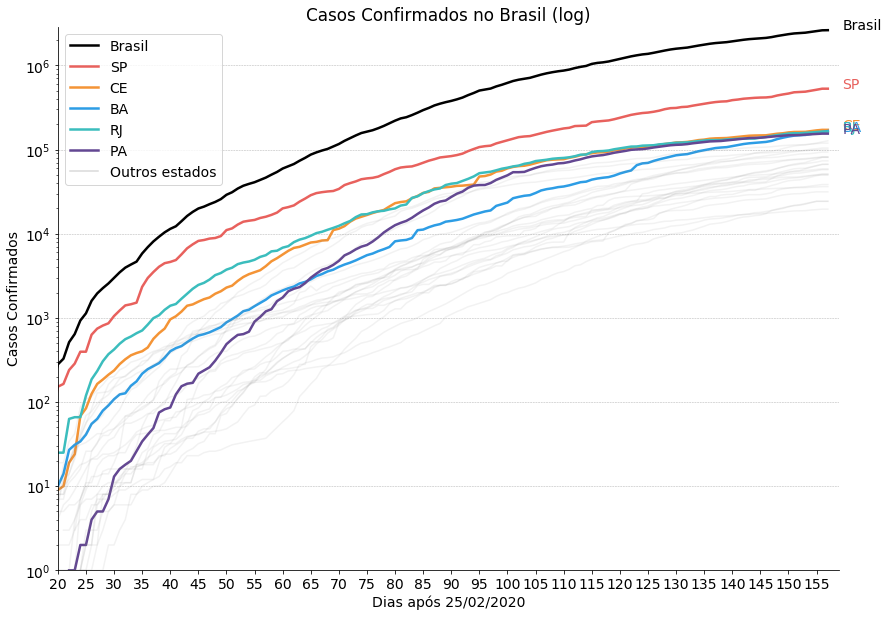

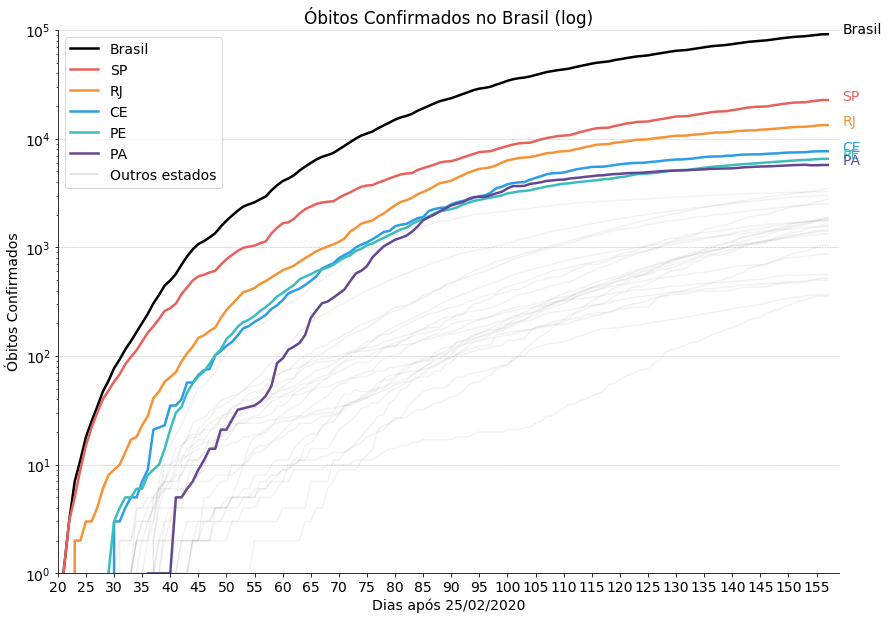

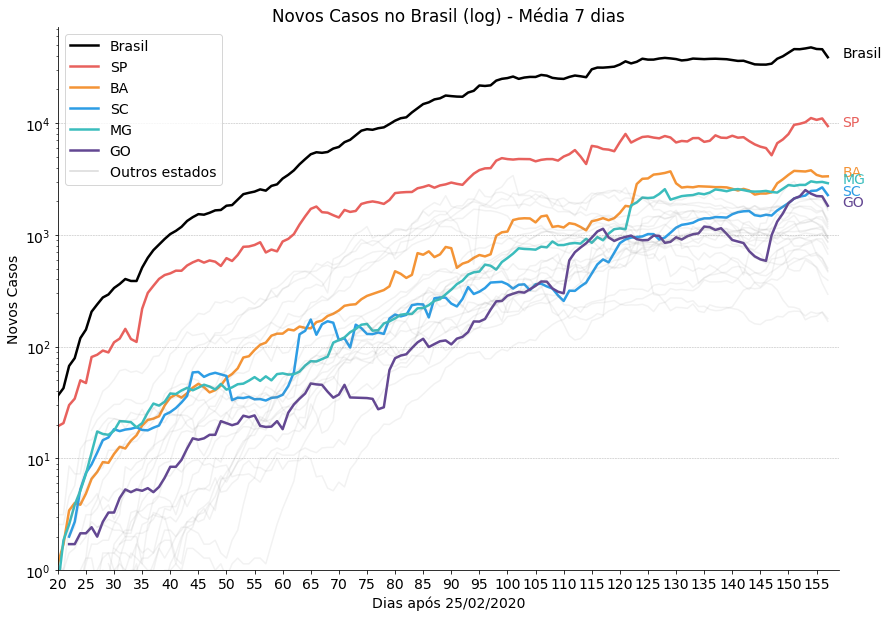

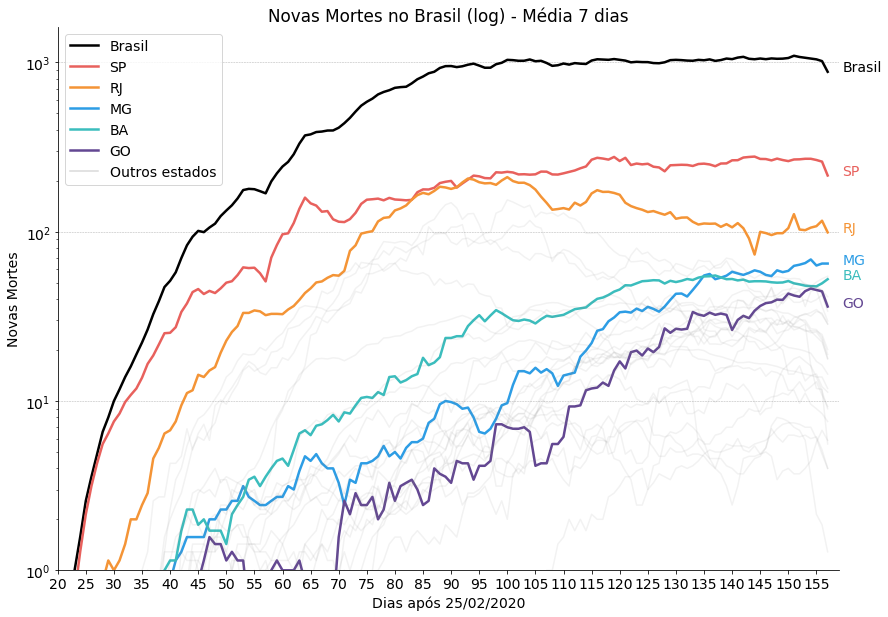

In [26]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

dia = len(df_Brasil.index)

for f in range(6, 10) :
    
    plt.rc('font', size = 14)
    plt.rcParams['figure.figsize'] = [14, 10]

    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()    
    plt.gca().get_yaxis().tick_left()
    plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)
    
    estados = list(df_estados.loc[df_estados['is_last'], 
                                  [df_estados.columns[f], 'state']                              
                                 ].sort_values(df_estados.columns[f], ascending = False)['state'].unique())
    
    # Brasil data
    x = list(df_Brasil.index.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-02-25", FMT)).days))
    x_max = dia

    if f in [6, 7] :
        y = list(df_Brasil.iloc[:, f - 6])
        y_max = max(df_Brasil.iloc[:, f - 6])

#         plt.plot(x, [np.exp(X * np.log(2) / b[f - 6] ) * a[f - 6] for X in x], label = "Dobra a cada " + str(b[f - 6]) + " dias", 
#                  linestyle = 'dashed', color = (.5, .5, .5, .3))

        plt.plot(x, y, marker = ' ', color = 'black', label = "Brasil", lw = 2.5) 
        plt.text(x_max * 1.01, 1.01 * y[-1], "Brasil", color = "black", fontsize = 14)        
        
        for e in range(27) :  

            x = list(df_estados.loc[df_estados['state'] == estados[e],
                                    'date'].map(lambda x : (datetime.strptime(x, FMT) - 
                                                            datetime.strptime("2020-02-25", FMT)).days))

            y = list(df_estados.loc[df_estados['state'] == estados[e], df_estados.columns[f]])

            if e < 5 :
                plt.plot(x, y, marker = ' ', label = estados[e], color = color[e], lw = 2.5)
                if y[-1] > 0 :
                    plt.text(x_max * 1.01, y[-1], estados[e], color = color[e], fontsize = 14)
                elif y[-2] > 0 :
                    plt.text(x_max * 1.01, y[-2], estados[e], color = color[e], fontsize = 14)
                elif y[-3] > 0 :
                    plt.text(x_max * 1.01, y[-3], estados[e], color = color[e], fontsize = 14)

            elif e == 5 :
                plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .1), lw = 1.5)
                plt.plot(1, 1, marker = ' ', label = 'Outros estados', color = (.5, .5, .5, .3), lw = 1.5)
            else :
                plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .1), lw = 1.5)
        
        plt.title(label[f] + " no Brasil (log)")
    
    else : 
        y = list(df_Brasil.iloc[:, f - 6].rolling(window = 7).mean())
        y_max = max(df_Brasil.iloc[:, f - 6])

        plt.plot(x, y, marker = ' ', color = 'black', label = "Brasil", lw = 2.5) 
        plt.text(x_max * 1.01, 1.01 * y[-1], "Brasil", color = "black", fontsize = 14) 
        
        for e in range(27) :  

            x = list(df_estados.loc[df_estados['state'] == estados[e],
                                    'date'].map(lambda x : (datetime.strptime(x, FMT) - 
                                                            datetime.strptime("2020-02-25", FMT)).days))

            y = list(df_estados.loc[df_estados['state'] == estados[e], df_estados.columns[f]].rolling(window = 7).mean())

            if e < 5 :
                plt.plot(x, y, marker = ' ', label = estados[e], color = color[e], lw = 2.5)
                if y[-1] > 0 :
                    plt.text(x_max * 1.01, y[-1], estados[e], color = color[e], fontsize = 14)
                elif y[-2] > 0 :
                    plt.text(x_max * 1.01, y[-2], estados[e], color = color[e], fontsize = 14)
                elif y[-3] > 0 :
                    plt.text(x_max * 1.01, y[-3], estados[e], color = color[e], fontsize = 14)

            elif e == 5 :
                plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .1), lw = 1.5)
                plt.plot(1, 1, marker = ' ', label = 'Outros estados', color = (.5, .5, .5, .3), lw = 1.5)
            else :
                plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .1), lw = 1.5)
            
        plt.title(label[f] + " no Brasil (log) - Média 7 dias")
    
    plt.xlim(20, x_max + 1)
    plt.ylim(1, y_max * 1.1)
    plt.xticks(np.arange(20, x_max, 5))
    
    plt.legend(loc = 2)
    plt.yscale('log')
    plt.xlabel("Dias após 25/02/2020")
    plt.ylabel(label[f])
    plt.savefig('Graphics/' + label[f] + " Brasil log.png")
    plt.show()

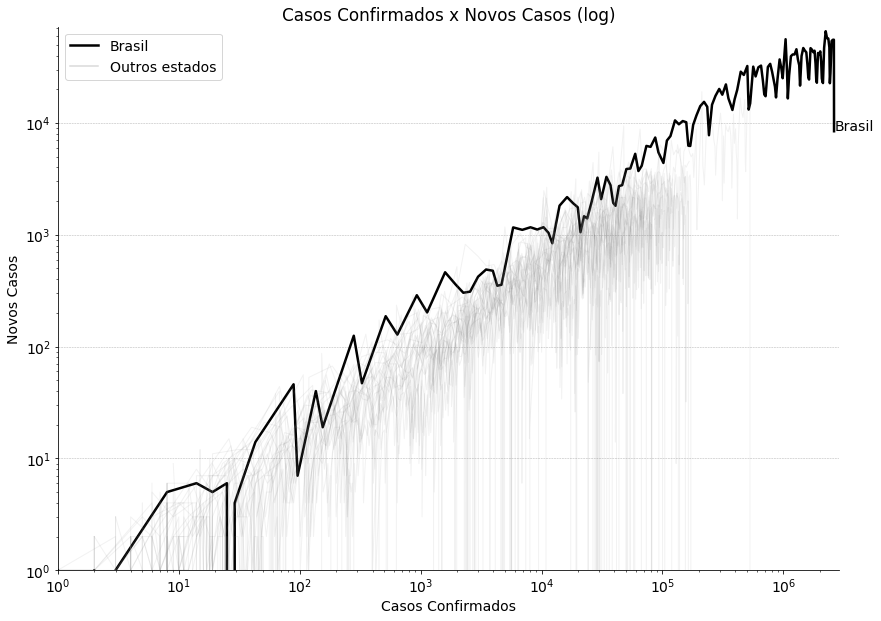

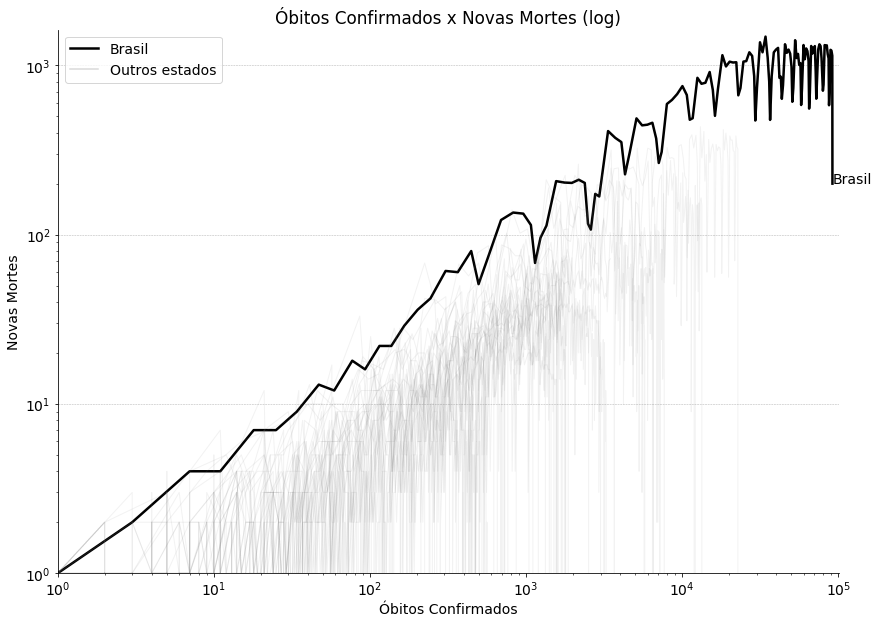

In [27]:
label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

for f in range(6, 8) :
    
    plt.rc('font', size = 14)
    plt.rcParams['figure.figsize'] = [14, 10]

    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()    
    plt.gca().get_yaxis().tick_left()
    plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)
    
    estados = list(df_estados.loc[df_estados['is_last'], 
                                  [df_estados.columns[f], 'state']                              
                                 ].sort_values(df_estados.columns[f], ascending = False)['state'].unique())
    
    # Brasil data
    x = list(df_Brasil.iloc[:, f - 6])
    x_max = max(x)

    y = list(df_Brasil.iloc[:, f - 4])
    y_max = max(y)
    
    plt.plot(x, y, marker = ' ', color = 'black', label = "Brasil", lw = 2.5) 
    plt.text(x_max * 1.01, 1.01 * y[-1], "Brasil", color = "black", fontsize = 14)   

    for e in range(27) :  

        x = list(df_estados.loc[df_estados['state'] == estados[e], df_estados.columns[f]])
        
        y = list(df_estados.loc[df_estados['state'] == estados[e], df_estados.columns[f + 2]])
        
#         if e == 0 :
#             plt.plot(x, y, marker = ' ', label = estados[e], color = color[e], lw = 2.5)
        
        if e == 5 :
            plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .1), lw = 1)
            plt.plot(1, 1, marker = ' ', label = 'Outros estados', color = (.5, .5, .5, .3), lw = 1.5)
        else :
            plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .1), lw = 1)
            
    plt.xlim(1, x_max * 1.1)
    plt.ylim(1, y_max * 1.1)       
        
    plt.title(label[f] + " x " + label[f + 2] + " (log)")
    plt.legend()
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel(label[f])
    plt.ylabel(label[f + 2])
    
#     plt.savefig('Graphics/' + label[f] + " Brasil log.png")
    plt.show()